<a href="https://colab.research.google.com/github/Anku0210/AirBnB-booking-Analysis/blob/main/Project_on_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Airbnb is an online platform which connects people who wishes to rent their houses to the people looking for accomodations in that local area.

# Import all required Liabraries


In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Airbnb data for analysis.

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/Airbnb NYC 2019.csv")

# Data Inspection

In [75]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [76]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [77]:
df.shape

(48895, 16)

In [78]:
# Before starting of data Analysis, we should know the basic infomartion of Airbnb Dataset such number of rows & columns, datatype we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After loading dataset, we can conclude few things after looking into the dataset

1) NaN or missing values present in the dataset
2) Dataset is divided into numerical and catogorical datatype.
3) Dataset consists of 48895 rows and 16 colums.

In [79]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

Checking for missing values

In [80]:
# count of missing values in each colums
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

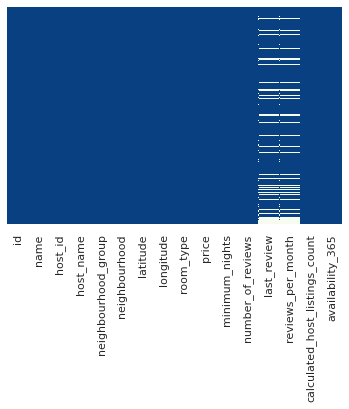

In [81]:
# plotting heat map to visualize missing values 
sns.heatmap(df.isnull(),yticklabels= False,cbar = False , cmap='GnBu_r')
sns.set(rc = {'figure.figsize':(15,8)})

Above heatmap shows clearly that most number of NaN value present in last_review and 'review per_month' columns. Now, we will have to handle this missing data before analysis.

# Univariate Analaysis of Features

**Feature no 1: Name**

This column contain the name (descreption) of the property which the host is giving on rent.

In [82]:
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [83]:
#geting the number of unique names from the name column 
df.name.unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [84]:
df.name.nunique()

47905

**Feature no 2: Host Id**

In [85]:
df.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

In [86]:
df.host_id.nunique()

37457

**Feature no 3: Host Name**

In [87]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [88]:
df.host_name.unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [89]:
df.host_name.nunique()

11452

**Feature no 4: Neighbourhood Group**

In [90]:
df.neighbourhood_group

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [91]:
#geting unique neighborhood groups from the neighborhood_groups column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [92]:
df.neighbourhood_group.nunique()

5

We can see that the neighbourhood group has 5 neighbour areas. So we can find out which neighbour area has most number of rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


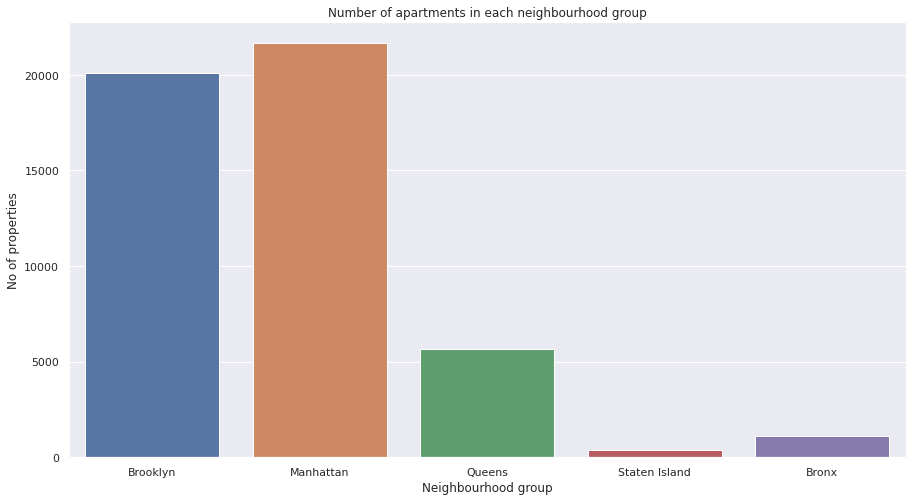

In [93]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df.neighbourhood_group).set_title("Number of apartments in each neighbourhood group")
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood group')
plt.show()

Observation: From the above plot we can conclude that Manhattan has most number of propeties followed by Brooklyn, Queens, Bronx and Staten Island

**Feature no 5: Neighbourhood**



In [94]:
df.neighbourhood

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

In [95]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [96]:
df.neighbourhood.nunique()

221

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


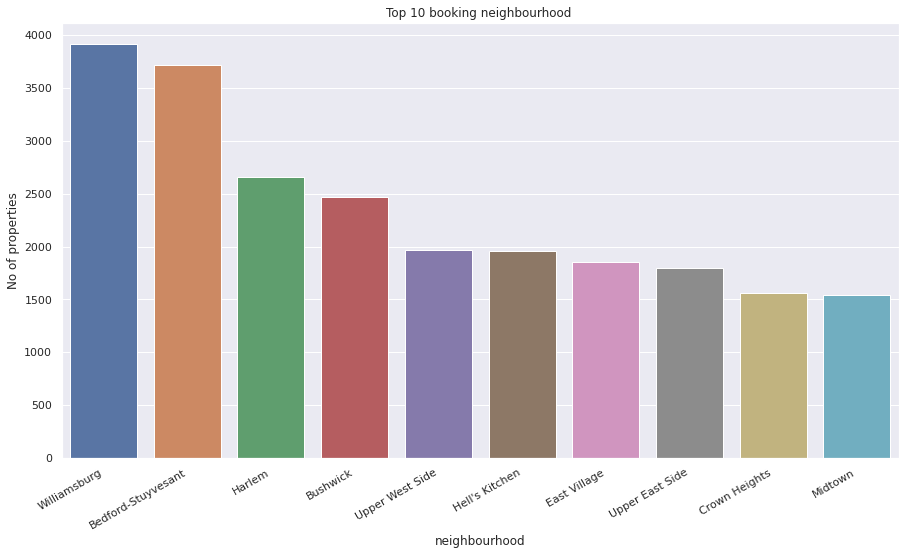

<Figure size 1080x576 with 0 Axes>

In [97]:
sns.countplot( df.neighbourhood, order =df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 booking neighbourhood ') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.figure(figsize=(15,8)) 
plt.show()

In [98]:
# now we have to store similar neighbourhood in their respective neighbour group in different dataframes
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

In [99]:
brooklyn_group_df

id                                             name    host_id  \
0          2539               Clean & quiet apt home by the park       2787   
3          3831                  Cozy Entire Floor of Brownstone       4869   
6          5121                                  BlissArtsSpace!       7356   
12         5803   Lovely Room 1, Garden, Best Area, Legal rental       9744   
15         6848                 Only 2 stops to Manhattan studio      15991   
...         ...                                              ...        ...   
48882  36482231                        Bushwick _ Myrtle-Wyckoff   66058896   
48884  36482783      Brooklyn Oasis in the heart of Williamsburg  274307600   
48887  36483152  Garden Jewel Apartment in Williamsburg New York  208514239   
48890  36484665  Charming one bedroom - newly renovated rowhouse    8232441   
48891  36485057    Affordable room in Bushwick/East Williamsburg    6570630   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
6              Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
12            Laurie            Brooklyn         South Slope  40.66829   
15     Allen & Irina            Brooklyn        Williamsburg  40.70837   
...              ...                 ...                 ...       ...   
48882          Luisa            Brooklyn            Bushwick  40.69652   
48884       Jonathan            Brooklyn        Williamsburg  40.71790   
48887          Melki            Brooklyn        Williamsburg  40.71232   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
3      -73.95976  Entire home/apt     89               1                270   
6      -73.95596     Private room     60              45                 49   
12     -73.98779     Private room     89               4                167   
15     -73.95352  Entire home/apt    140               2                148   
...          ...              ...    ...             ...                ...   
48882  -73.91079     Private room     40              20                  0   
48884  -73.96238     Private room    190               7                  0   
48887  -73.94220  Entire home/apt    170               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
3      2019-07-05               4.64                               1   
6      2017-10-05               0.40                               1   
12     2019-06-24               1.34                               3   
15     2019-06-29               1.20                               1   
...           ...                ...                             ...   
48882         NaN                NaN                               1   
48884         NaN                NaN                               1   
48887         NaN                NaN                               3   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   

       availability_365  
0                   365  
3                   194  
6                     0  
12                  314  
15                   46  
...                 ...  
48882                31  
48884               341  
48887               365  
48890                 9  
48891                36  

[20104 rows x 16 columns]

Text(0.5, 0, 'Neighbourhood')

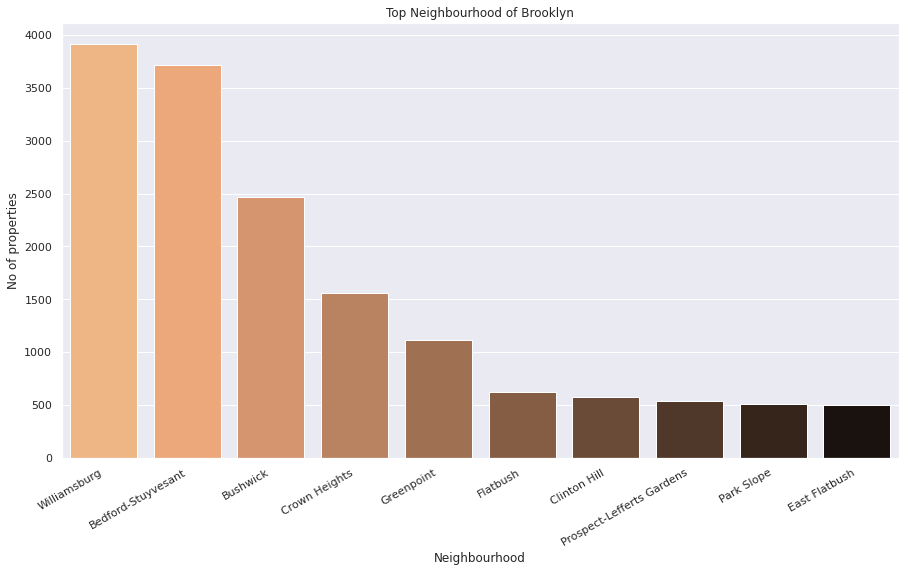

In [100]:
sns.countplot(x="neighbourhood", data=brooklyn_group_df, palette="copper_r",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Brooklyn")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

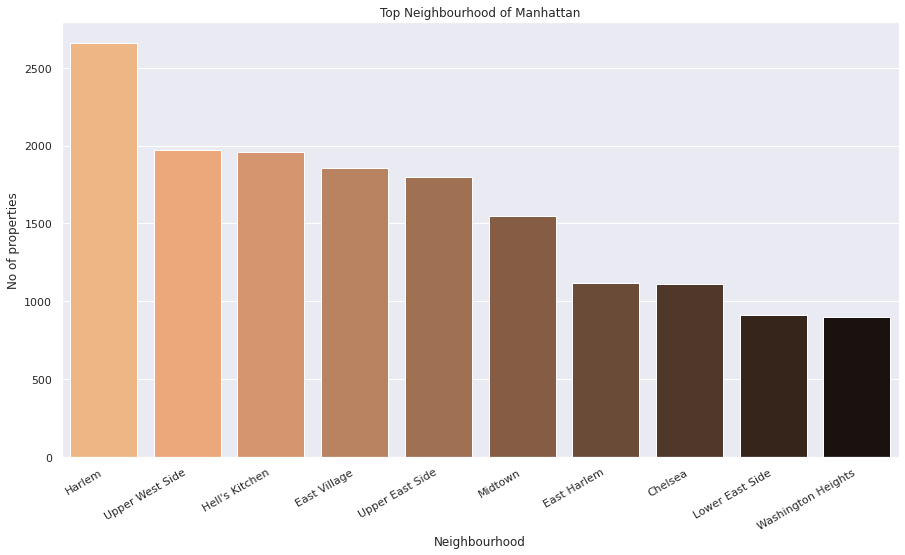

In [101]:
sns.countplot(x="neighbourhood", data=manhattan_group_df, palette="copper_r",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Manhattan")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

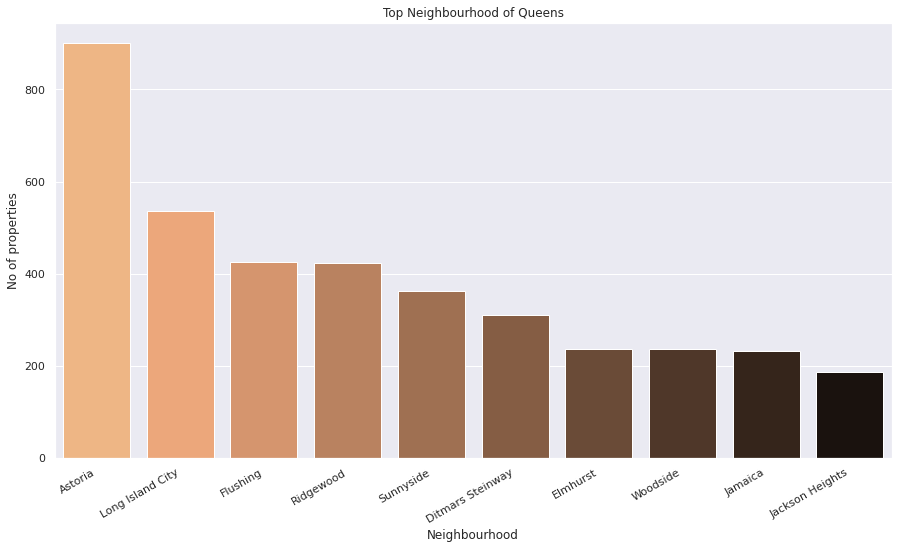

In [102]:
sns.countplot(x="neighbourhood", data=Queens_group_df, palette="copper_r",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Queens")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

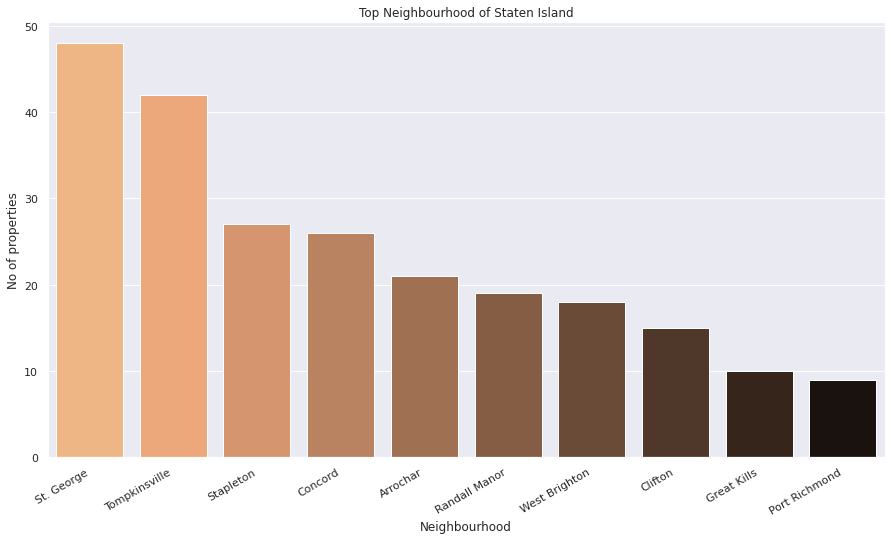

In [103]:
sns.countplot(x="neighbourhood", data=Staten_Island_group_df, palette="copper_r",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Staten Island")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

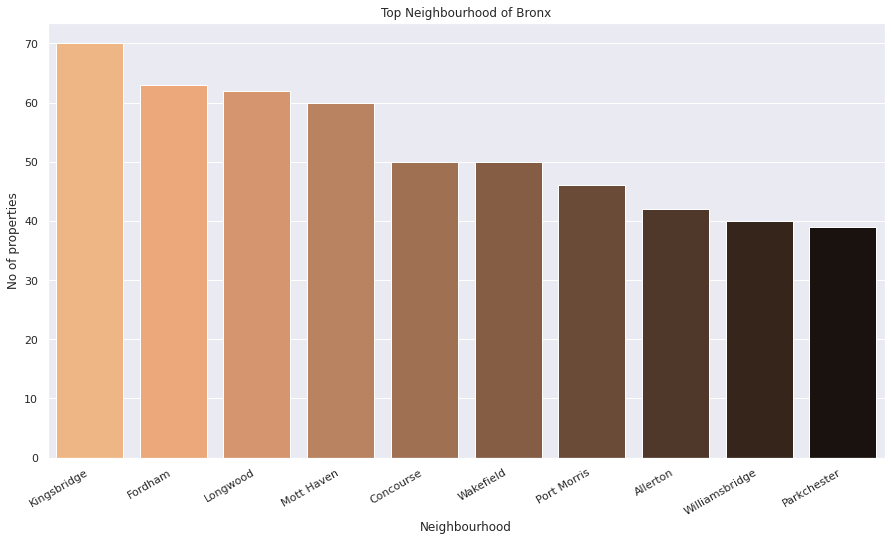

In [104]:
sns.countplot(x="neighbourhood", data=Bronx_group_df, palette="copper_r",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Bronx")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

In [105]:
df.neighbourhood.value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top 10 Bronx neighbourhood value count')

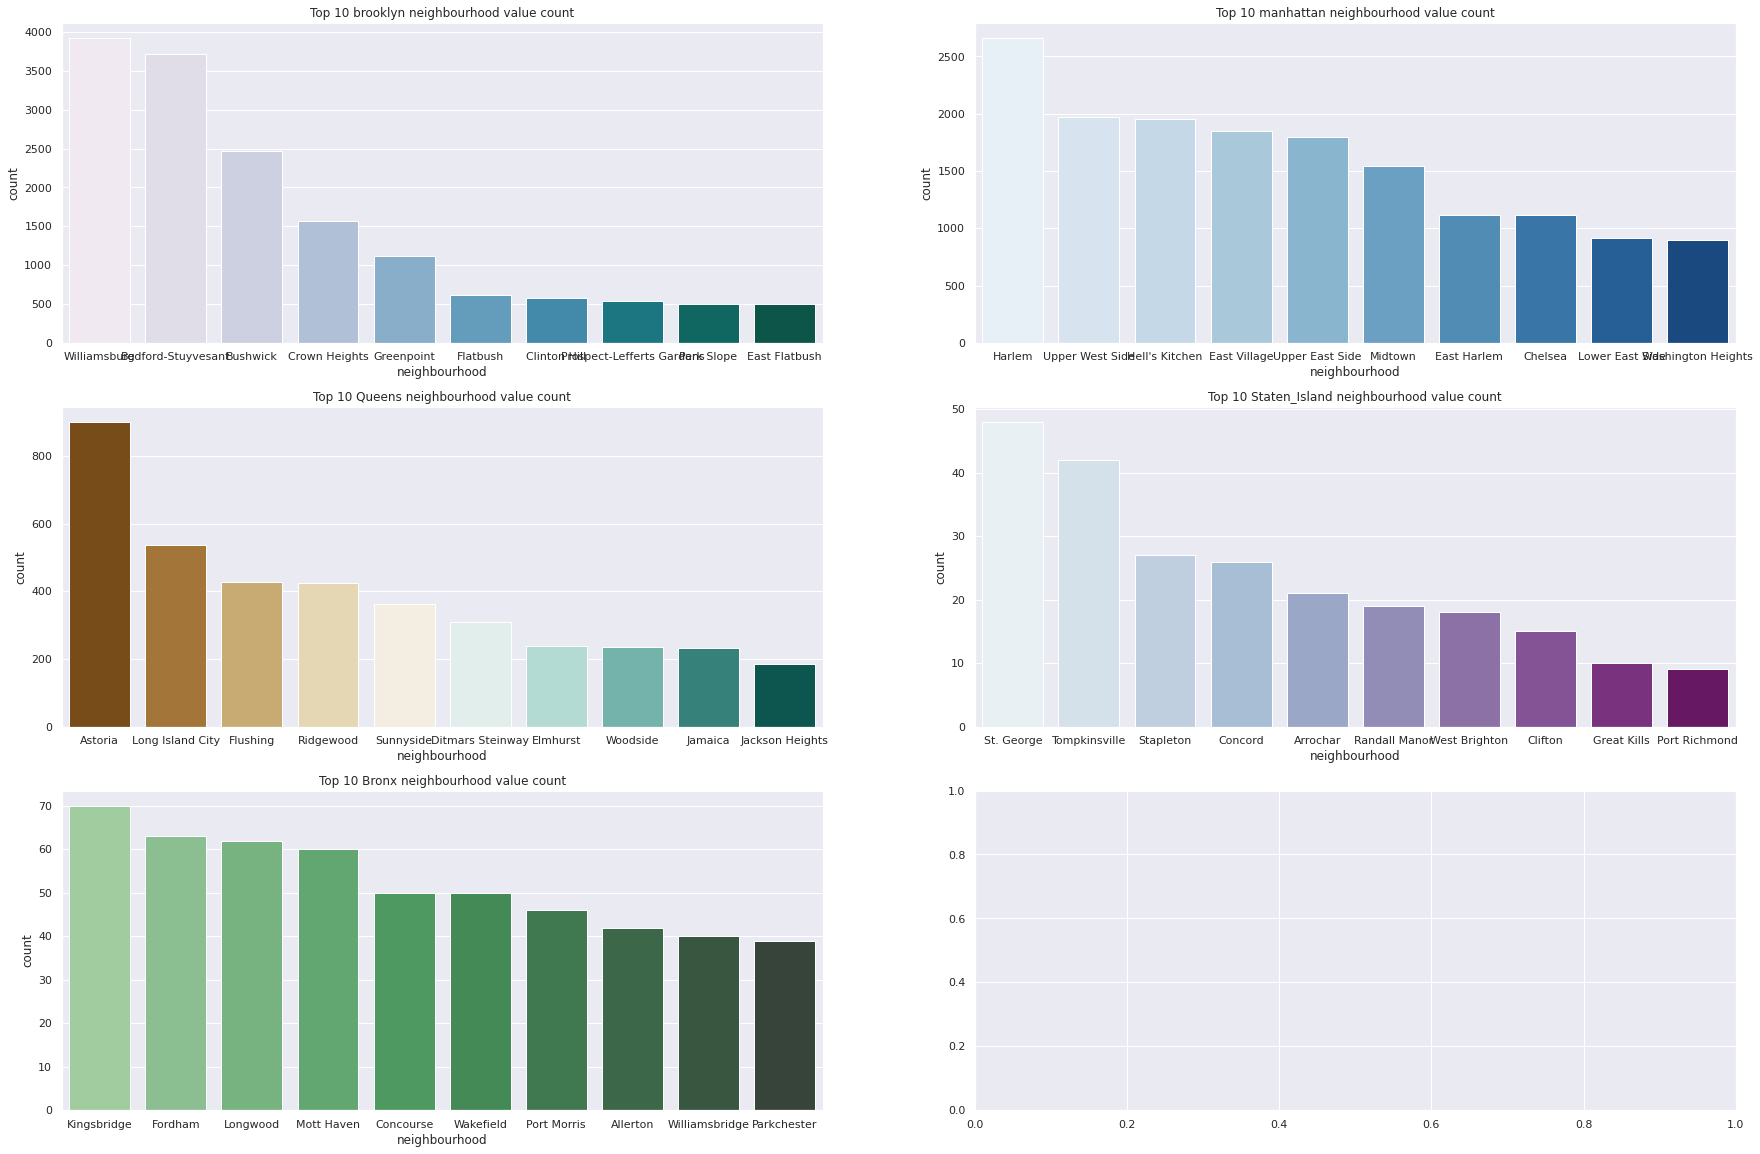

In [106]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],x="neighbourhood", data=brooklyn_group_df, palette="PuBuGn",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 brooklyn neighbourhood value count')
              
              
sns.countplot(ax=axes[0,1],x="neighbourhood", data=manhattan_group_df, palette="Blues",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],x="neighbourhood", data=Queens_group_df, palette="BrBG",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],x="neighbourhood", data=Staten_Island_group_df, palette="BuPu",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],x="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Bronx neighbourhood value count')

Observations from the above graphs are as follow:

Willamsburg, Bedford and Bushwick have most no of bookings in brooklyn neighbourhood_group.







**Column no 6 & 7: Latitude and Longitude**

In [107]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [108]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


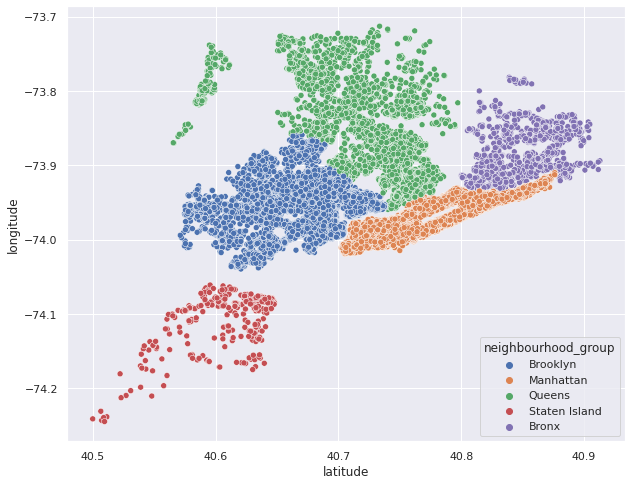

In [109]:
# Pointing the plot on graph through scattering plot
plt.figure(figsize=(10,8))
sns.scatterplot(df.latitude,df.longitude, hue='neighbourhood_group', data=df)

Text(0.5, 1.0, 'Density of No of properties')

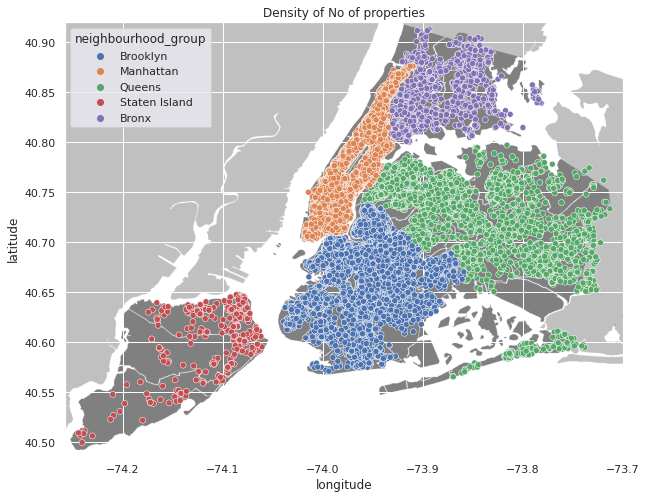

In [110]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of No of properties')

**Column no 8 : Room Type**

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Type of rooms')

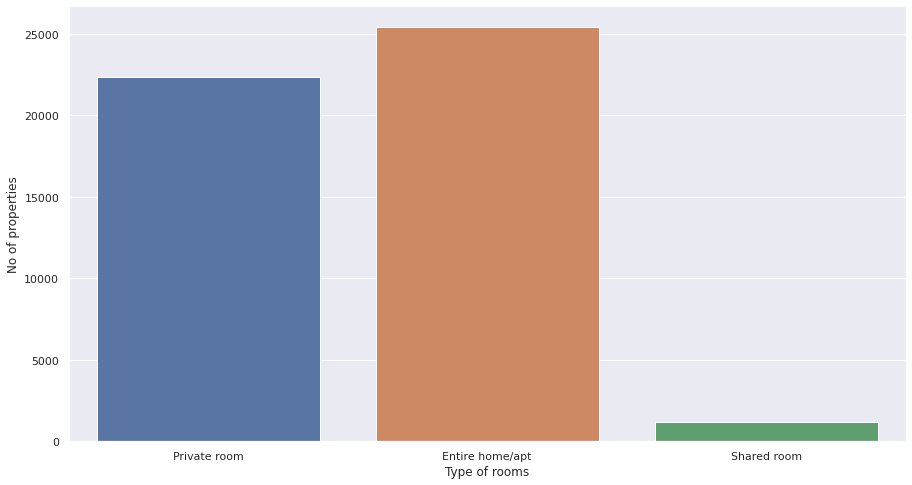

In [111]:
#number of rooms_type provided by the hosts
print(df.room_type.value_counts())
sns.countplot(df.room_type)
#adding x and y labels to the plot
plt.ylabel('No of properties') 
plt.xlabel('Type of rooms') 

Text(0.5, 1.0, 'Top 10 Bronx neighbourhood value count')

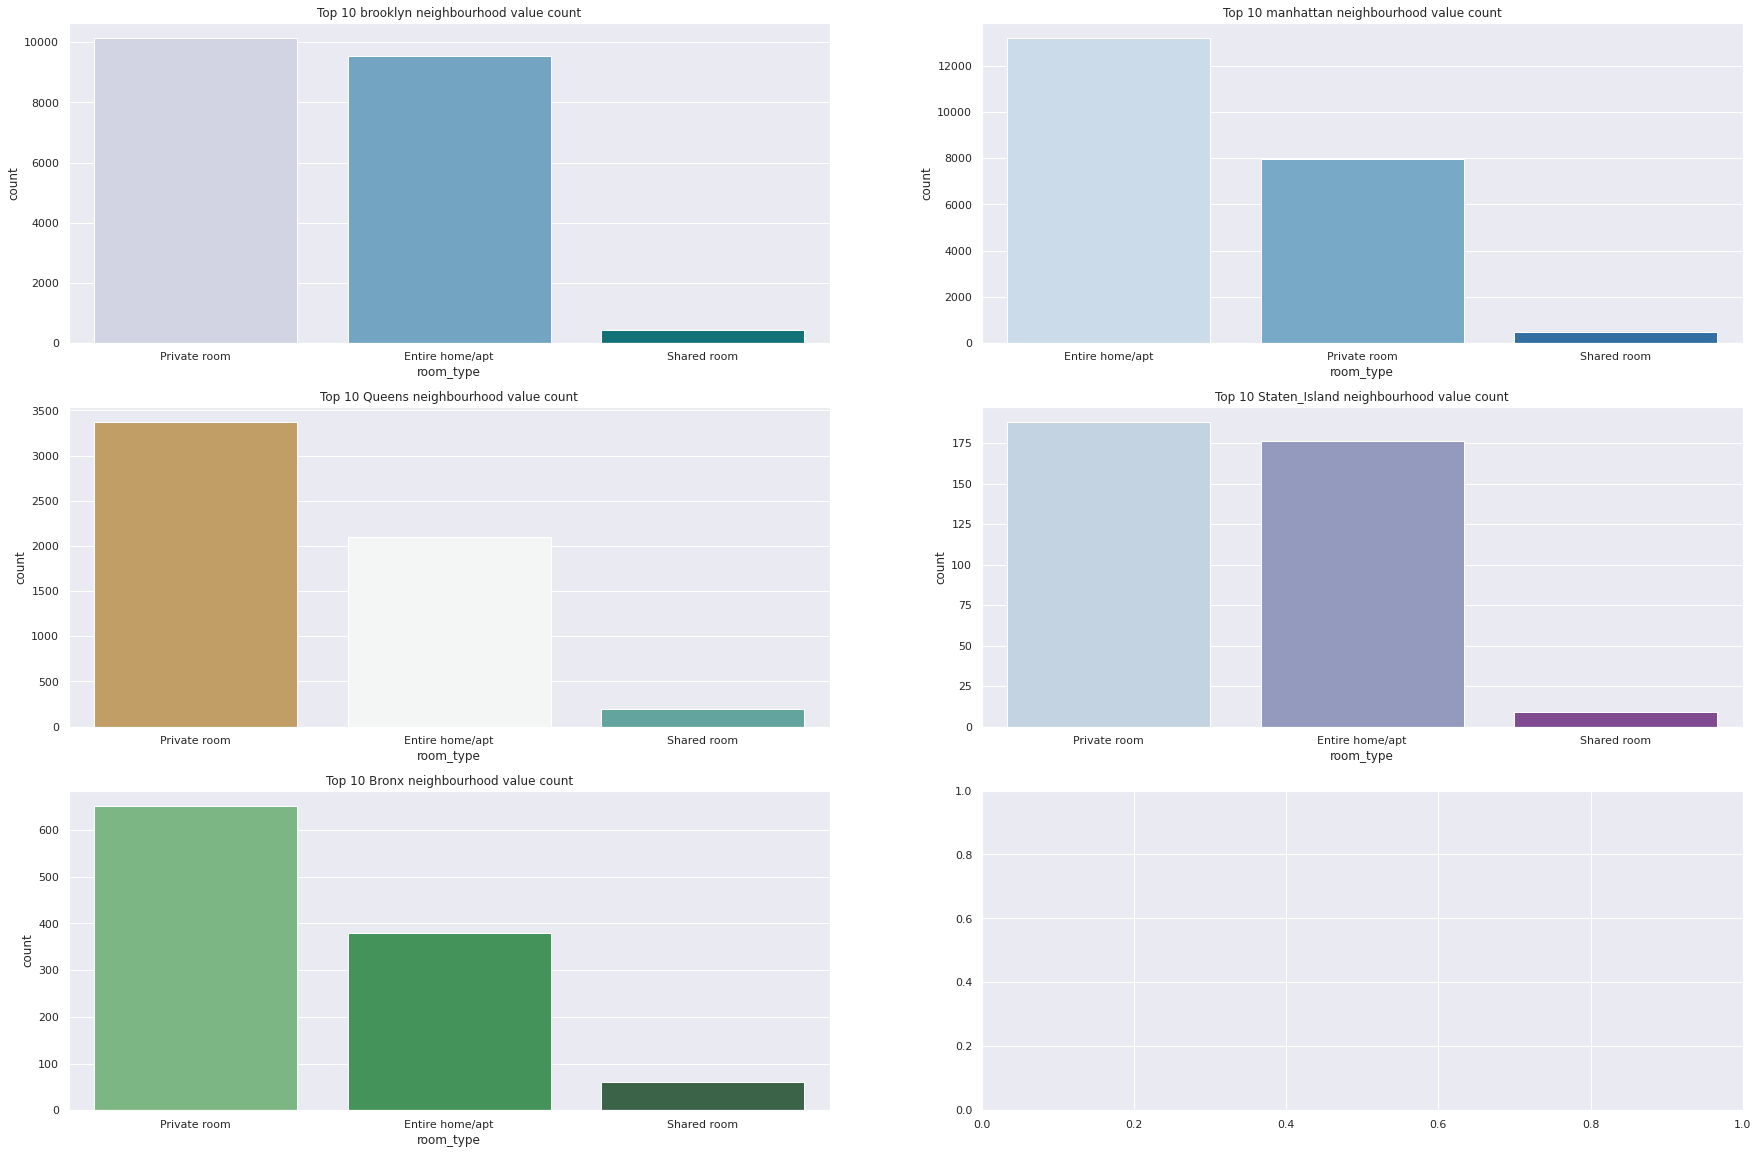

In [112]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],x="room_type", data=brooklyn_group_df, palette="PuBuGn",
              order=brooklyn_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 brooklyn neighbourhood value count')
              
              
sns.countplot(ax=axes[0,1],x="room_type", data=manhattan_group_df, palette="Blues",
              order=manhattan_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],x="room_type", data=Queens_group_df, palette="BrBG",
              order=Queens_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],x="room_type", data=Staten_Island_group_df, palette="BuPu",
              order=Staten_Island_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],x="room_type", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 Bronx neighbourhood value count')

**Column no 9: Price**

Text(0, 0.5, 'No of properties')

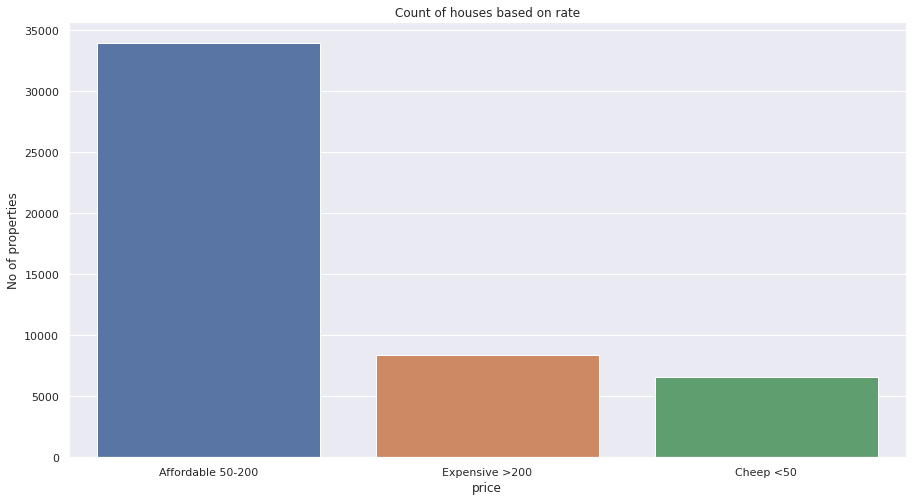

In [113]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep <50'
  elif price>=50 and price<=200:
    return 'Affordable 50-200'
  else:
    return 'Expensive >200'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of properties') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


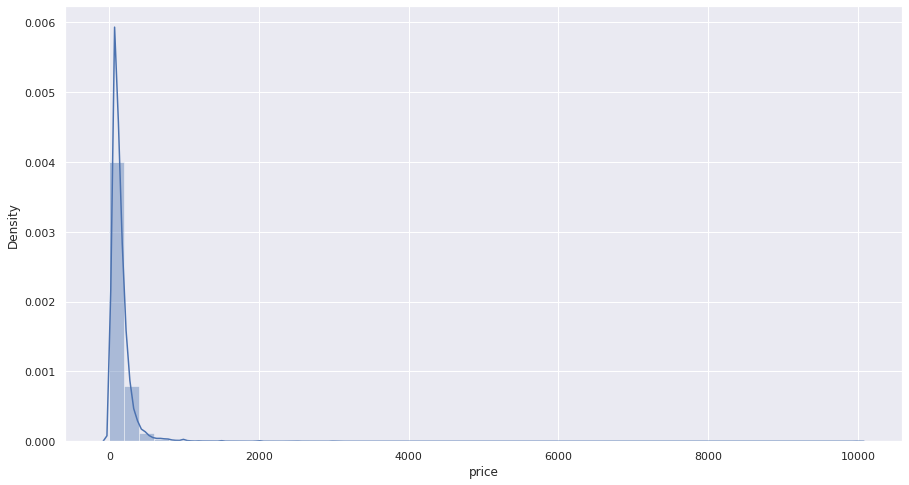

In [114]:
sns.distplot(df.price)

**Feature no 10: Minimum Nights**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of properties')

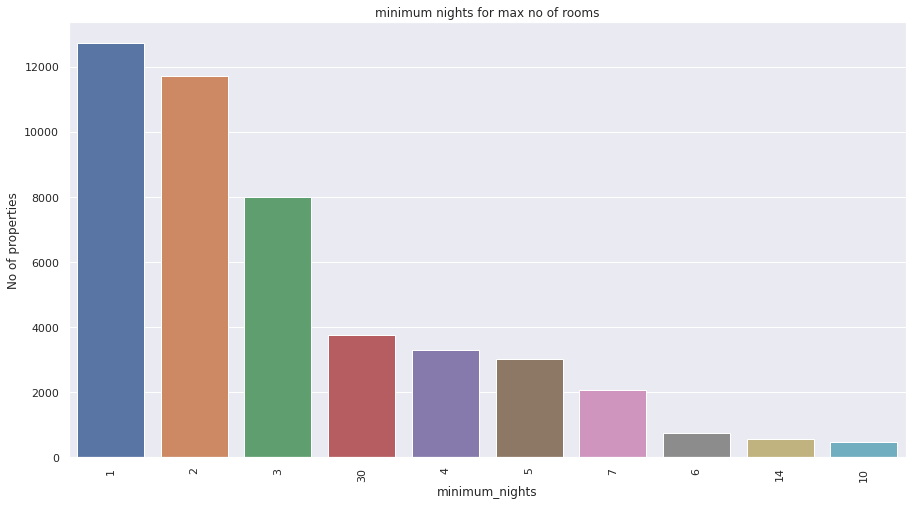

In [115]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of properties')

**Feature no 11: Number of Reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


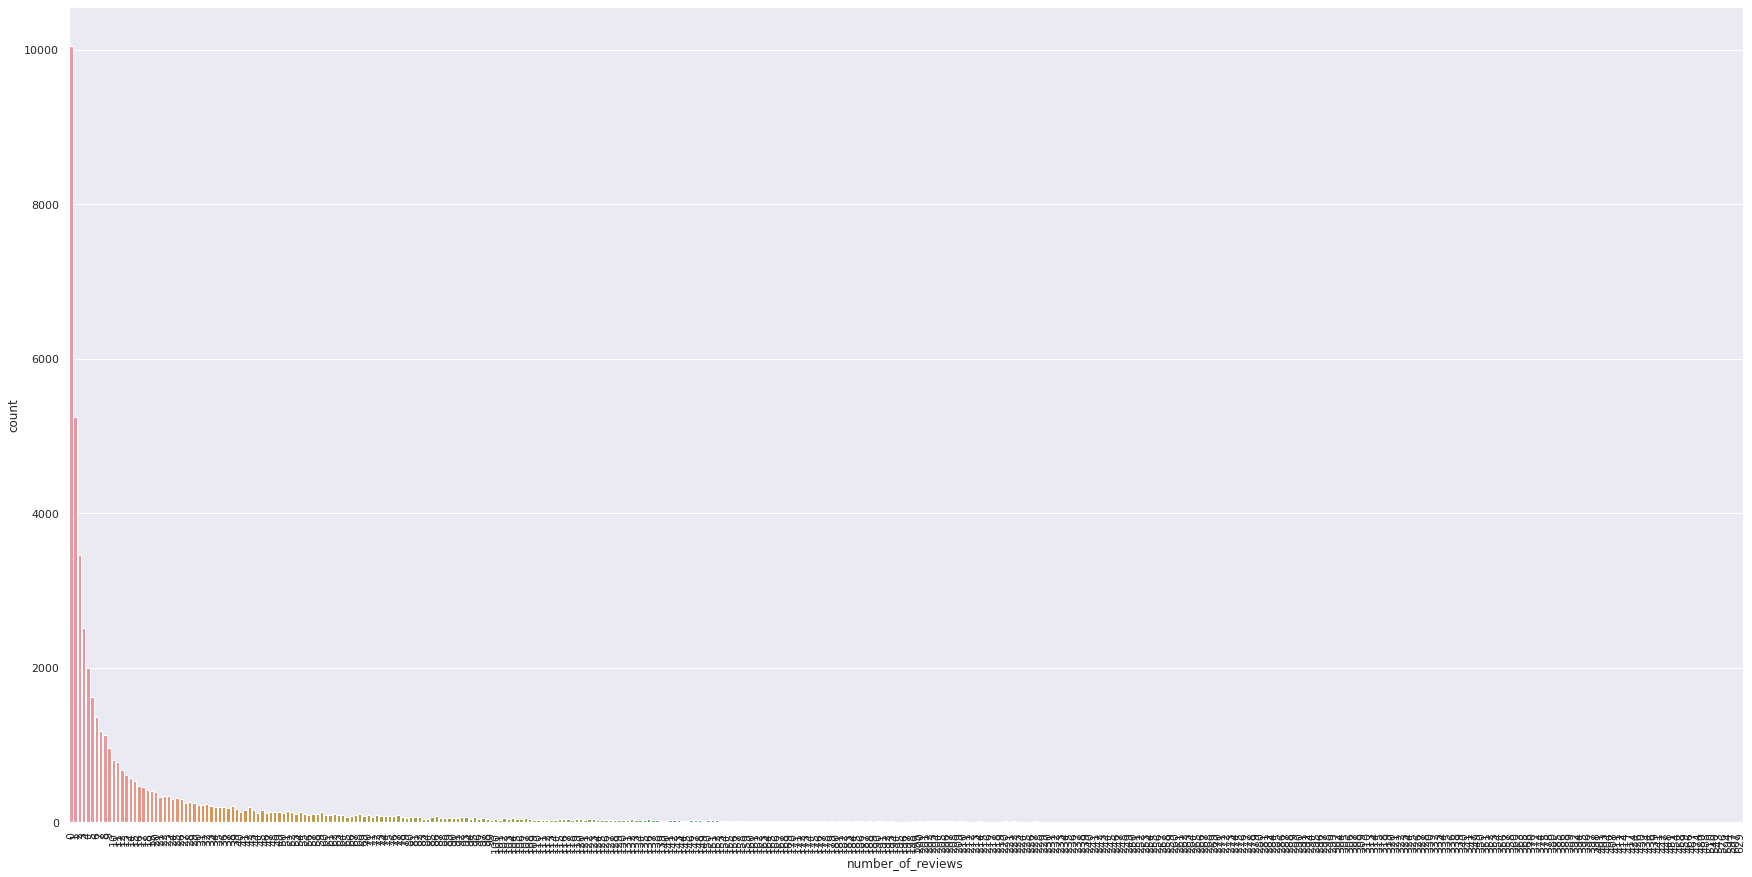

In [116]:
#settingt he size of the figure 
plt.figure(figsize=(30,15))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


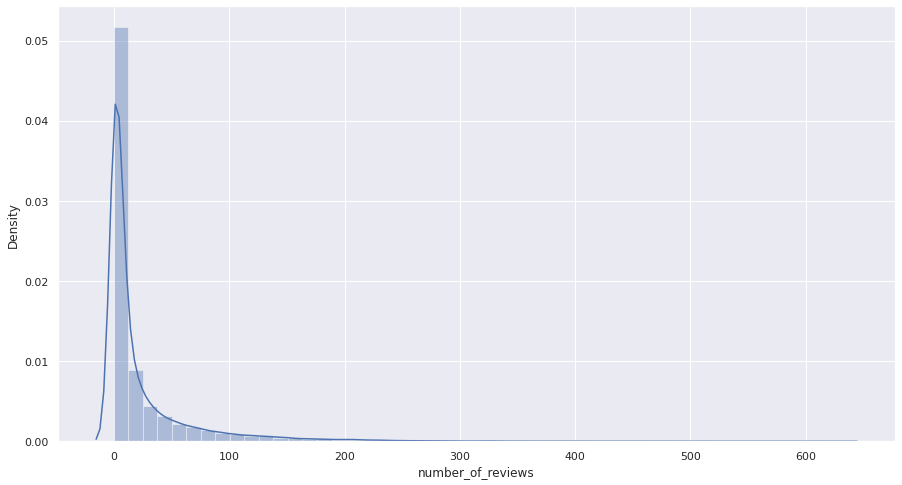

In [117]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

In [118]:
#properties recieving highest reviews.
highest_reviews = df.sort_values(by='number_of_reviews', ascending=False)
highest_reviews.head()

id                            name   host_id host_name  \
11759   9145202         Room near JFK Queen Bed  47621202      Dona   
2031     903972      Great Bedroom in Manhattan   4734398        Jj   
2030     903947  Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117    Private Bedroom in Manhattan   4734398        Jj   
13495  10101135         Room Near JFK Twin Beds  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
11759              Queens       Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
2030            Manhattan        Harlem  40.82124  -73.93838  Private room   
2015            Manhattan        Harlem  40.82264  -73.94041  Private room   
13495              Queens       Jamaica  40.66939  -73.76975  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  2019-07-05   
2031      49               1                607  2019-06-21   
2030      49               1                597  2019-06-23   
2015      49               1                594  2019-06-15   
13495     47               1                576  2019-06-27   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

**Feature no 12: Last Review**

In [119]:
df['last_review']=pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [120]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-03-28 and the most recent date is 2019-07-08 in last review


In [121]:
df[df.last_review < '2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 20 to 6546
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              279 non-null    int64         
 1   name                            279 non-null    object        
 2   host_id                         279 non-null    int64         
 3   host_name                       279 non-null    object        
 4   neighbourhood_group             279 non-null    object        
 5   neighbourhood                   279 non-null    object        
 6   latitude                        279 non-null    float64       
 7   longitude                       279 non-null    float64       
 8   room_type                       279 non-null    object        
 9   price                           279 non-null    int64         
 10  minimum_nights                  279 non-null    int64         
 11  numb

In [122]:
df[df.last_review.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10052 non-null  int64         
 1   name                            10042 non-null  object        
 2   host_id                         10052 non-null  int64         
 3   host_name                       10047 non-null  object        
 4   neighbourhood_group             10052 non-null  object        
 5   neighbourhood                   10052 non-null  object        
 6   latitude                        10052 non-null  float64       
 7   longitude                       10052 non-null  float64       
 8   room_type                       10052 non-null  object        
 9   price                           10052 non-null  int64         
 10  minimum_nights                  10052 non-null  int64         
 11  nu

**Feature no 13:** **Reviews per month**


In [123]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'No of rooms')

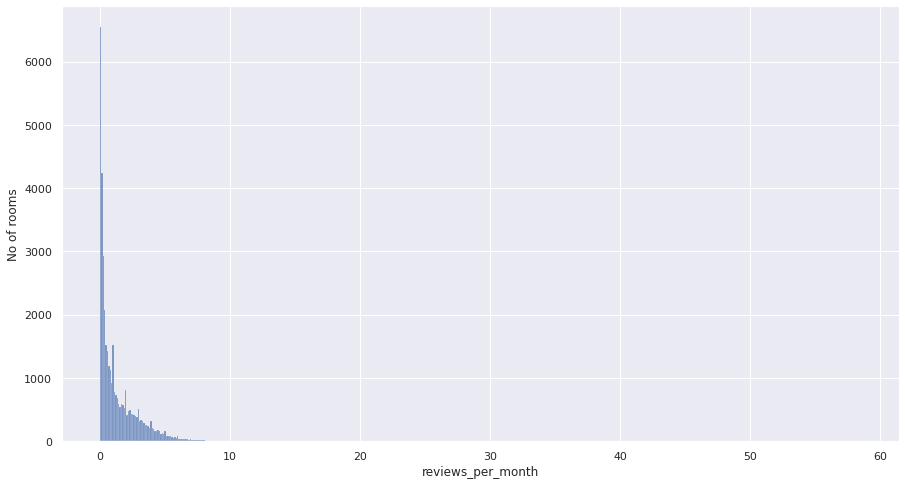

In [124]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')

**Feature NO. 14 : calculated_host_listings_count**

In [125]:
#grouping by host id and taking sum of reviews per month
top_10_host_listings_count=df.groupby(['host_id']).agg({'calculated_host_listings_count':'max'}).sort_values('calculated_host_listings_count',ascending=False).reset_index()
#taking top 10 from df and storing it in list  
top_10_host_listings_count_list=top_10_host_listings_count[:10]['host_id'].tolist()
# finding the names of all the top 10 host by host id 
top_10_host_listings_count_df=df[df.host_id.isin(top_10_host_listings_count_list)].sort_values('calculated_host_listings_count',ascending=False)

<Figure size 1202.4x595.44 with 0 Axes>

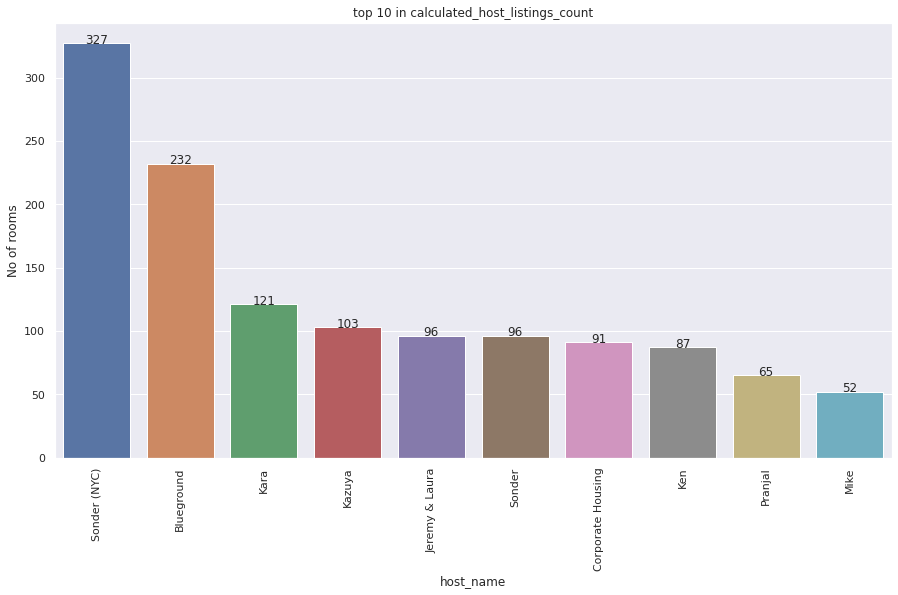

<Figure size 1202.4x595.44 with 0 Axes>

In [126]:
# code to add the count on top of bar graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#creating a bar graph 
sns.barplot(x="host_name", y='calculated_host_listings_count' ,data=top_10_host_listings_count_df).set_title('top 10 in calculated_host_listings_count')
# adding lables on bar graph
addlabels(top_10_host_listings_count_df.host_name.unique().tolist(),top_10_host_listings_count[:10]['calculated_host_listings_count'].tolist())
#adding y label to plot 
plt.ylabel('No of rooms')
plt.xticks(rotation=90)
plt.figure(figsize=(16.7,8.27)) 

**Feature NO. 15 : availability_365**

In [127]:
df.availability_365.describe()  

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x595.44 with 0 Axes>

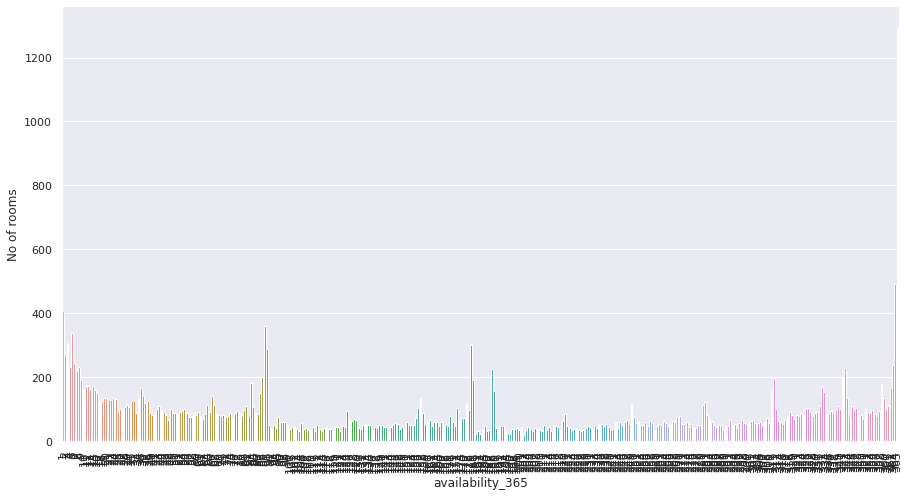

<Figure size 1440x595.44 with 0 Axes>

In [128]:
df_365_0=df.loc[df['availability_365']>0]
sns.countplot(df_365_0.availability_365)
plt.xticks(rotation=90)
plt.ylabel('No of rooms')
plt.figure(figsize=(20,8.27)) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'availability_365 density plot befor removeing outliers')

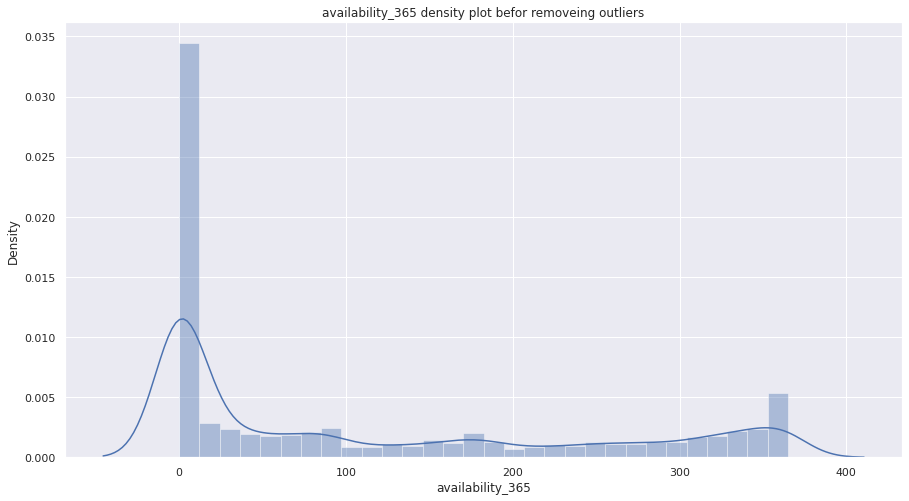

In [129]:
sns.distplot(df.availability_365).set_title("availability_365 density plot befor removeing outliers")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'availability_365 density plot after removeing outliers')

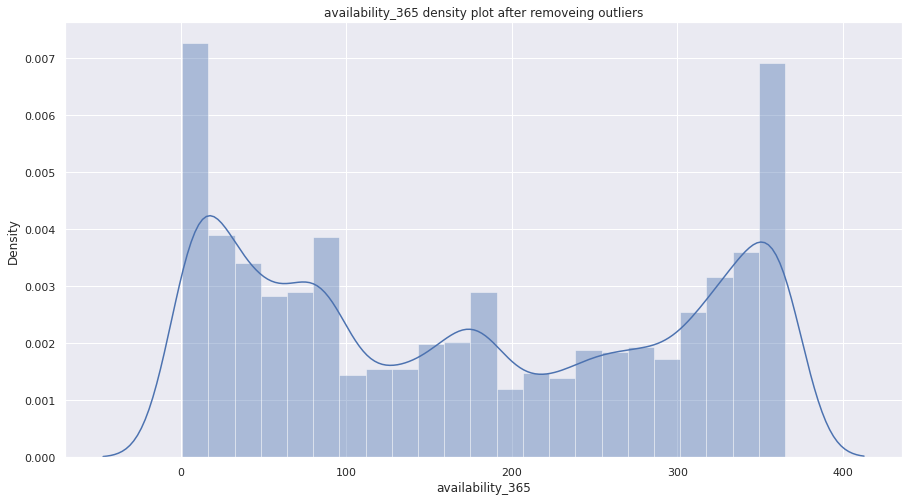

In [130]:
df_365_0=df.loc[df['availability_365']>0]
sns.distplot(df_365_0.availability_365).set_title("availability_365 density plot after removeing outliers")

Data cleaning and wrangling

In [131]:
# calling features
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [132]:
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [133]:
print(df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool


We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name, host_name, last_review.

In [134]:
# Replacing all NaN values in “review_per_month_ with 0
df.reviews_per_month.fillna(0, inplace=True)
print(df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


Data visulaization

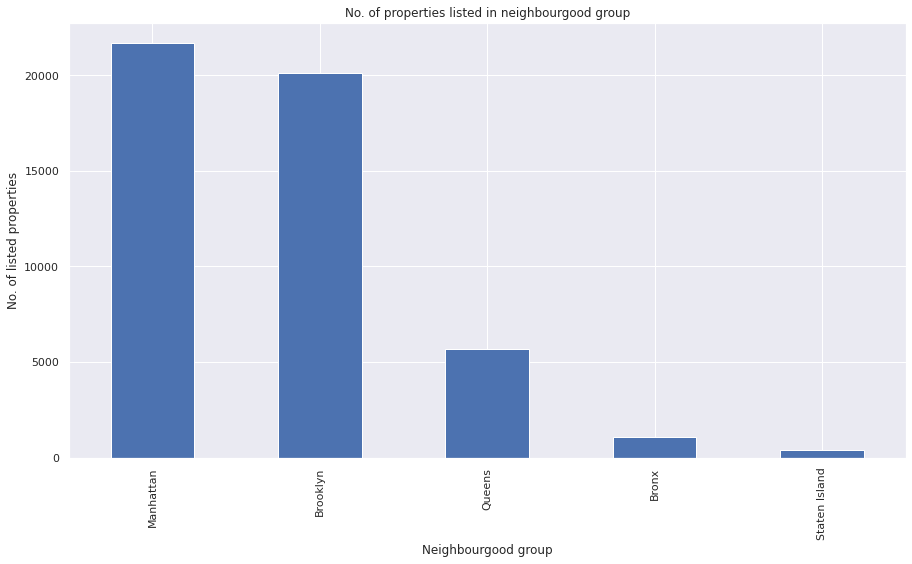

In [135]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('No. of properties listed in neighbourgood group')
plt.xlabel('Neighbourgood group')
plt.ylabel('No. of listed properties')
plt.show()

In [136]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

neighbourhood_group  price
0               Bronx   2500
1            Brooklyn  10000
2           Manhattan  10000
3              Queens  10000
4       Staten Island   5000

Top planning area

Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

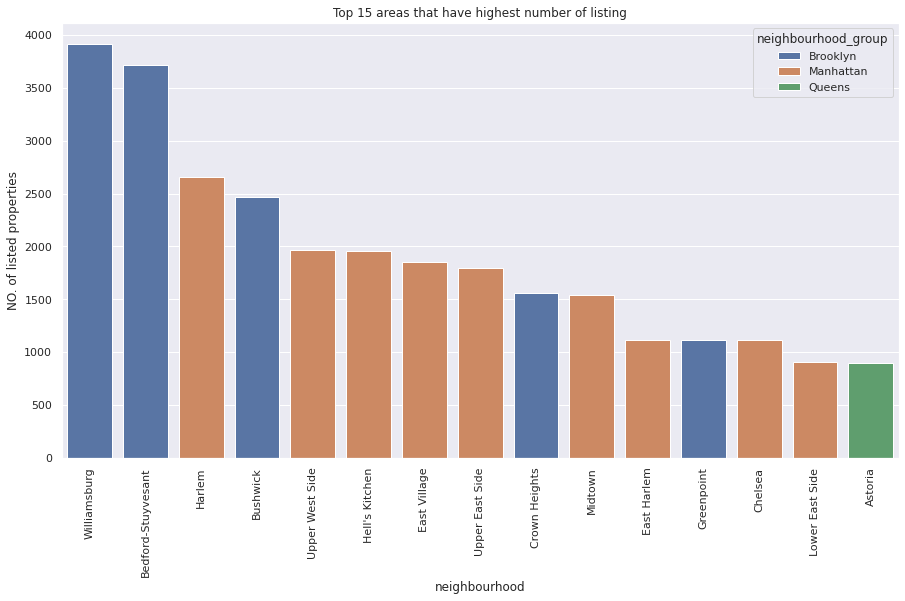

In [137]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

1. if we have higher min nights does that mean price per night will be less ( need more analysis) and is there any relation between any columns

In [138]:
# Minimum night and price per night is not corealted.

In [139]:
# if we have higher min nights does that mean price per night will be less     
df.groupby(['room_type','minimum_nights'])

In [140]:
minimum_night_price = df.groupby(['room_type','minimum_nights'],
                                 as_index=False)['price'].median()
minimum_night_price.loc[~(minimum_night_price['minimum_nights'] == 999)] 
minimum_night_price.loc[~((minimum_night_price['price'] >= 500) )] 

room_type  minimum_nights  price
0    Entire home/apt               1  158.0
1    Entire home/apt               2  165.0
2    Entire home/apt               3  168.0
3    Entire home/apt               4  165.0
4    Entire home/apt               5  155.0
..               ...             ...    ...
187      Shared room              62   35.0
188      Shared room              90   25.0
189      Shared room             100   33.0
190      Shared room             120   35.0
191      Shared room             999  110.0

[190 rows x 3 columns]

does no of review affect the price ?


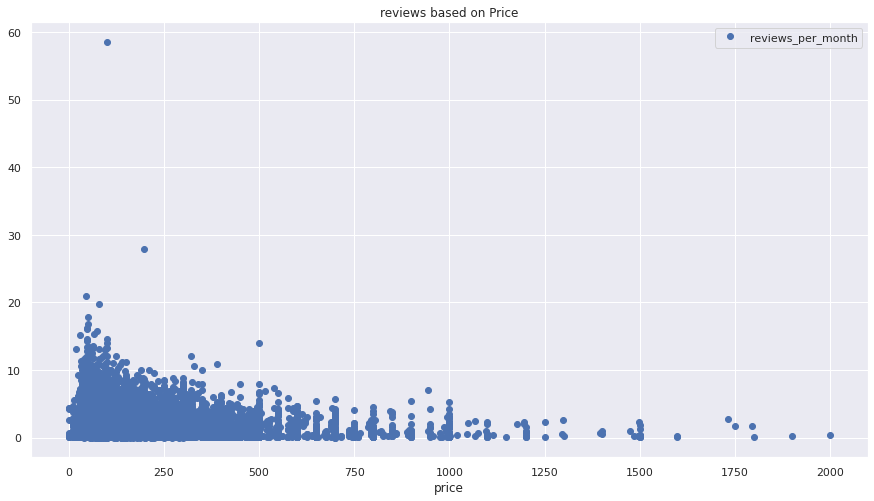

In [141]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f874e8ff990>>

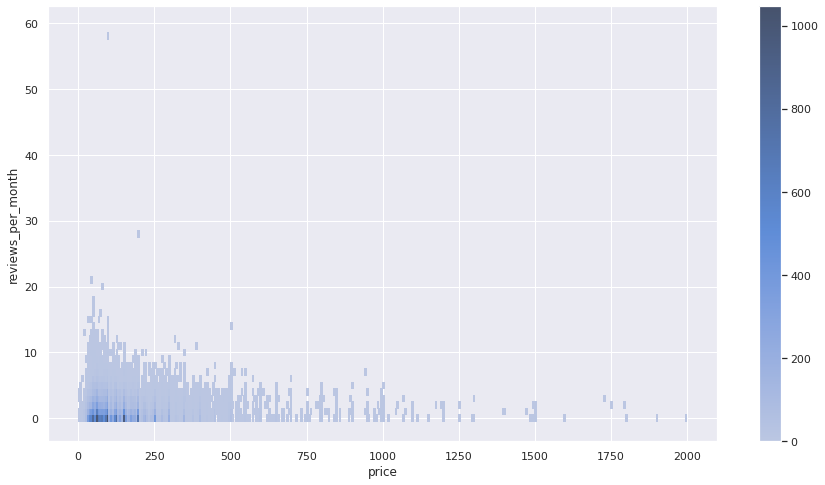

In [142]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250

2) reviews per month decrease as you increase the price

2. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

Text(0.5, 1.0, 'Density of rooms')

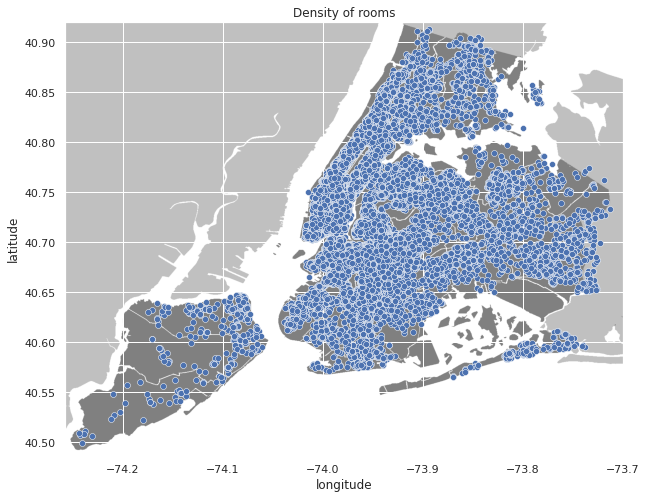

In [143]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude').set_title('Density of rooms')

In [144]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [145]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

3) does no of review affect the price

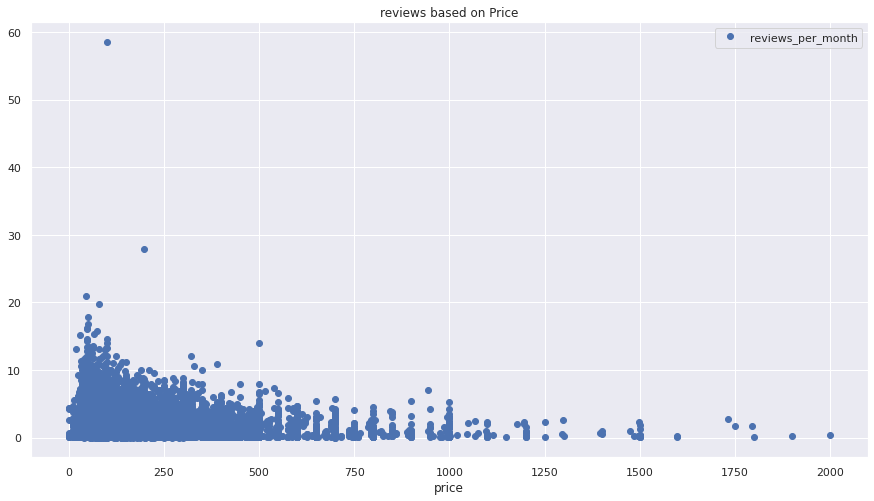

In [146]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f874d6c2d50>>

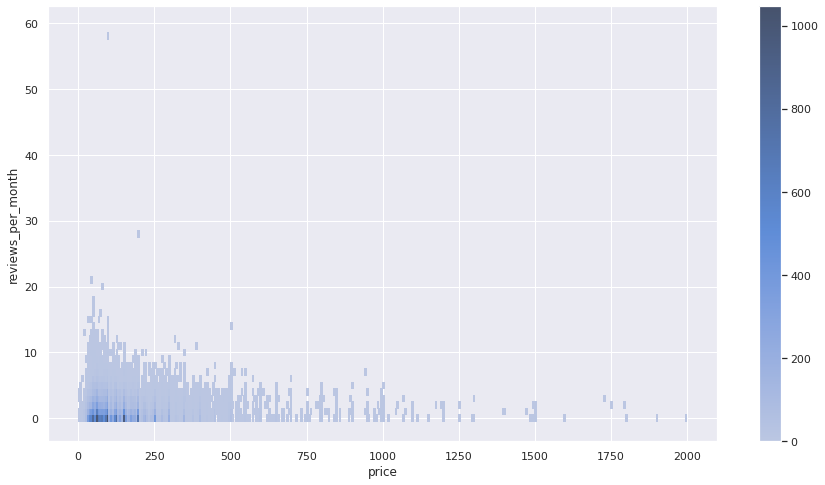

In [147]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

Observations
1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250

2) reviews per month decrease as you increase the price

4) Which neighbourhood is most expensive in NewYork City? (at each neighbourhood-group)
At manhattan, Tribecca and flatiron district.
At brooklyn, Dumbo
At Bronx, Riverdale
At queens, ponsit
At Staten Island, Fort wastword

In [148]:
# minimum and maximum price neighbourhood wise
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].median().reset_index()

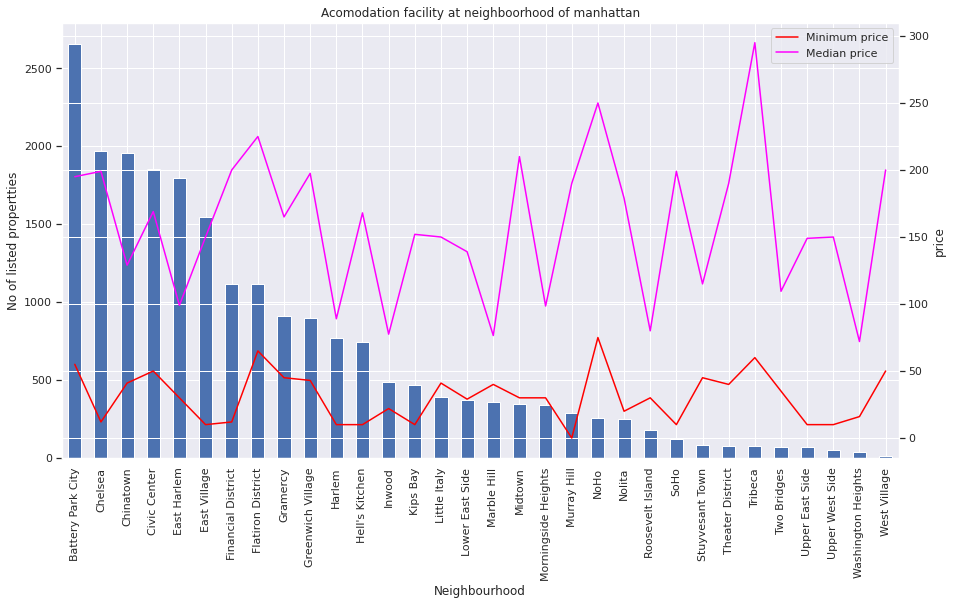

Number of neighborhoods in Manhattan where rental housing is listed: 32


In [149]:
# find out number of airbnb acomodation facility at neighboorhood of manhattan
man_data = df[df['neighbourhood_group'] == 'Manhattan']
man_ax1 = man_data['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation facility at neighboorhood of manhattan')
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Manhattan'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Manhattan'])
plt.legend(loc='upper right') #set legend position
plt.title('')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing is listed: {man_data["neighbourhood"].nunique()}')

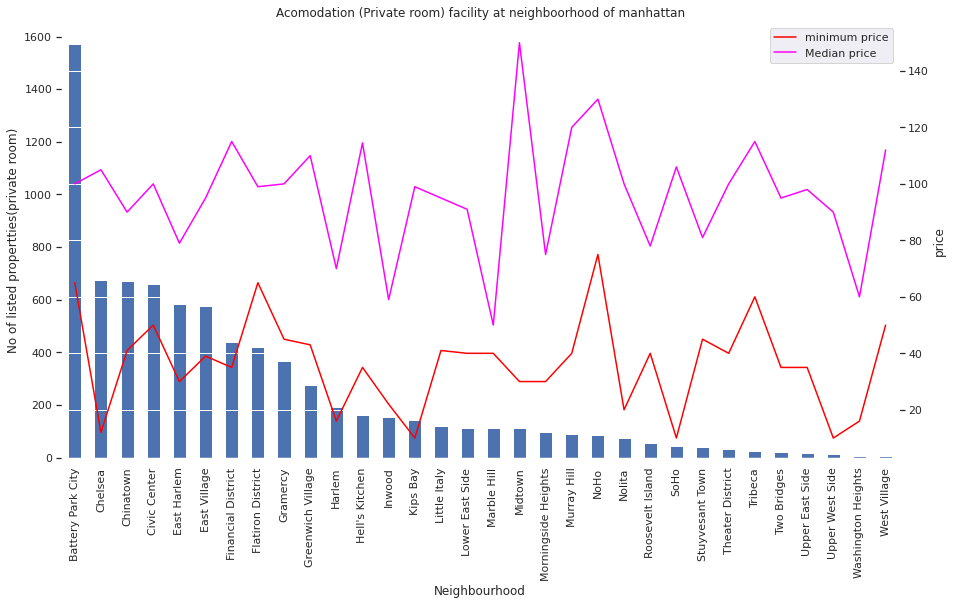

Number of neighborhoods in Manhattan where rental housing (private room) is listed: 32


In [150]:
# find out number of airbnb acomodation facility at neighboorhood of manhattan depend on room type private room
#plt.rcParams['axes.facecolor'] = 'skyblue'
pri_room = man_data[man_data['room_type']=='Private room']
man_ax1 = pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
man_ax1.set_facecolor('xkcd:white')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (private room) is listed: {pri_room["neighbourhood"].nunique()}')

In [151]:
# find out number of airbnb acomodation facility at neighboorhood of manhattan depend on room type Entire home/apt

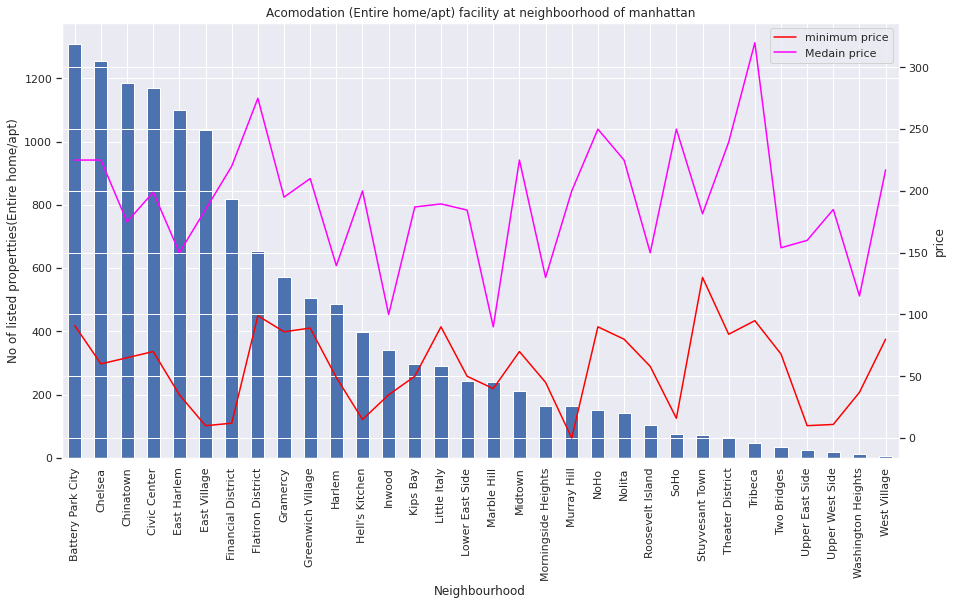

Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: 32


In [152]:
apt_room = man_data[man_data['room_type']=='Entire home/apt']
man_ax1 = apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of manhattan')
                                                     
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Medain price',
             data=apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: {apt_room["neighbourhood"].nunique()}')

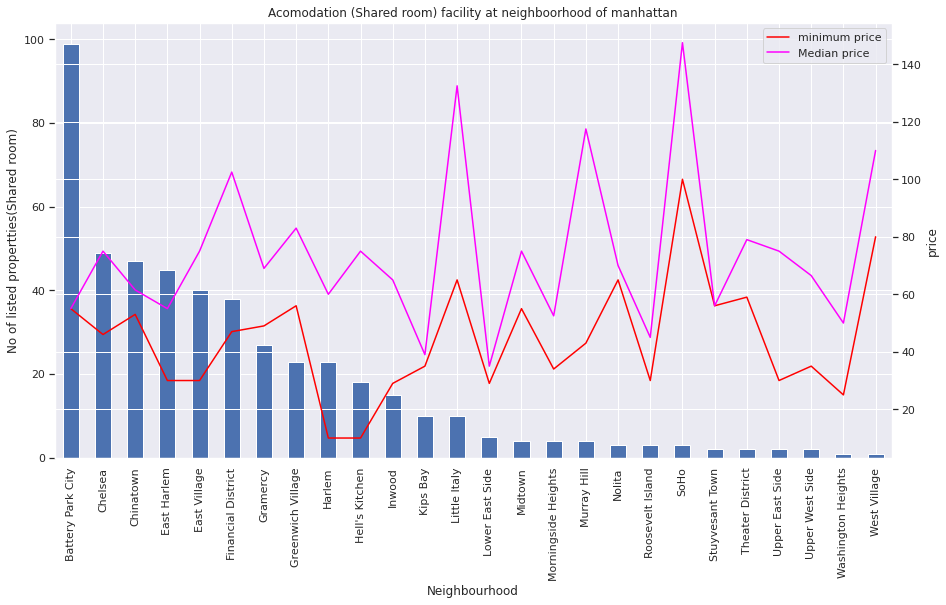

Number of neighborhoods in Manhattan where rental housing (shared room) is listed: 26


In [153]:
# find out number of airbnb acomodation facility at neighboorhood of manhattan depend on room type Shared room
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (shared room) is listed: {shr_room["neighbourhood"].nunique()}')

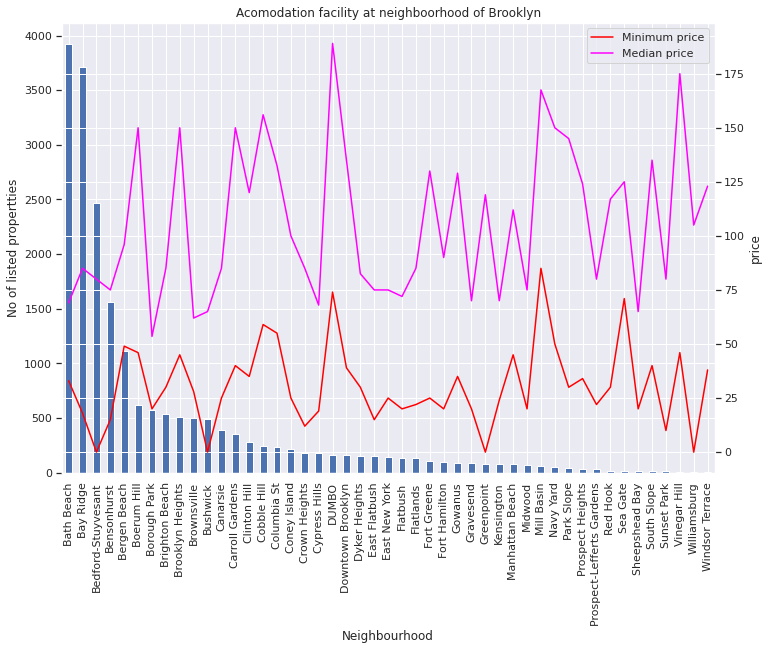

Number of neighborhoods in Brooklyn where rental housing is listed: 47


In [154]:
# find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type private room
brooklyn_data = df[df['neighbourhood_group'] == 'Brooklyn']
sns.set(rc={'figure.figsize':(11.7,8.27)})
bro_ax1 =brooklyn_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Brooklyn')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Brooklyn'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Brooklyn'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing is listed: {brooklyn_data["neighbourhood"].nunique()}')

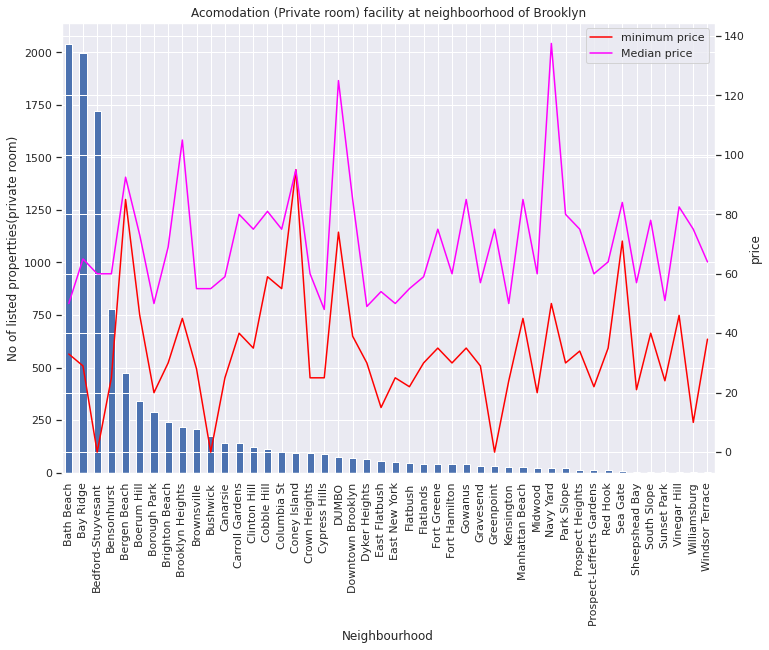

Number of neighborhoods in Brooklyn where rental housing (private room) is listed: 46


In [155]:
# find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type private room
b_pri_room = brooklyn_data[brooklyn_data['room_type']=='Private room']
bro_ax1 = b_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Brooklyn')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (private room) is listed: {b_pri_room["neighbourhood"].nunique()}')

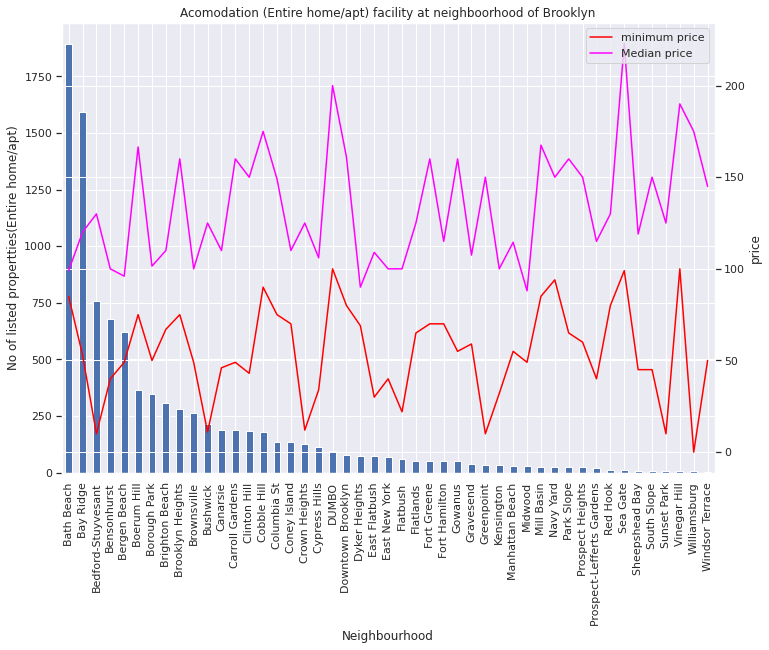

Number of neighborhoods in Brooklyn where rental housing (entire home/apt) is listed: 47


In [156]:
# find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type entire apt
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Entire home/apt']
man_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Brooklyn')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (entire home/apt) is listed: {b_apt_room["neighbourhood"].nunique()}')

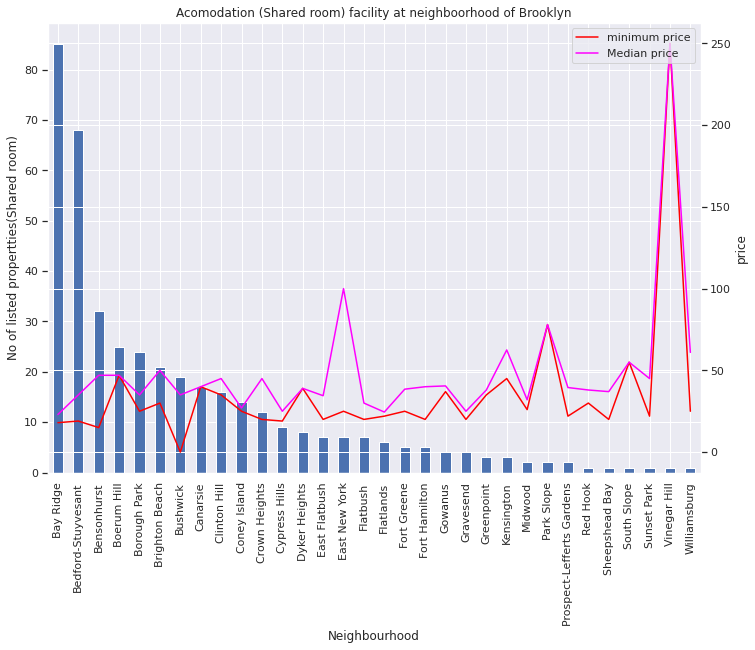

Number of neighborhoods in Brooklyn where rental housing (shared room) is listed: 32


In [157]:
# find out number of airbnb acomodation facility at neighboorhood of Brooklyn depend on room type shared room
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Shared room']
bro_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Brooklyn')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (shared room) is listed: {b_apt_room["neighbourhood"].nunique()}')

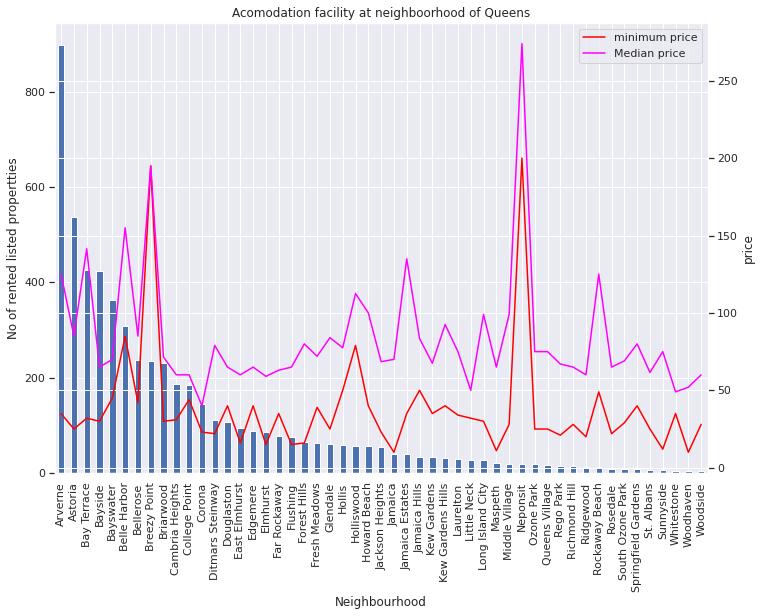

Number of neighborhoods in Queens where rental housing is listed: 51


In [158]:
# find out number of airbnb acomodation facility at neighboorhood of Queens
Queens_data = df[df['neighbourhood_group'] == 'Queens']
sns.set(rc={'figure.figsize':(11.7,8.27)})
que_ax1 = Queens_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Queens'])"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Queens'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing is listed: {Queens_data["neighbourhood"].nunique()}')

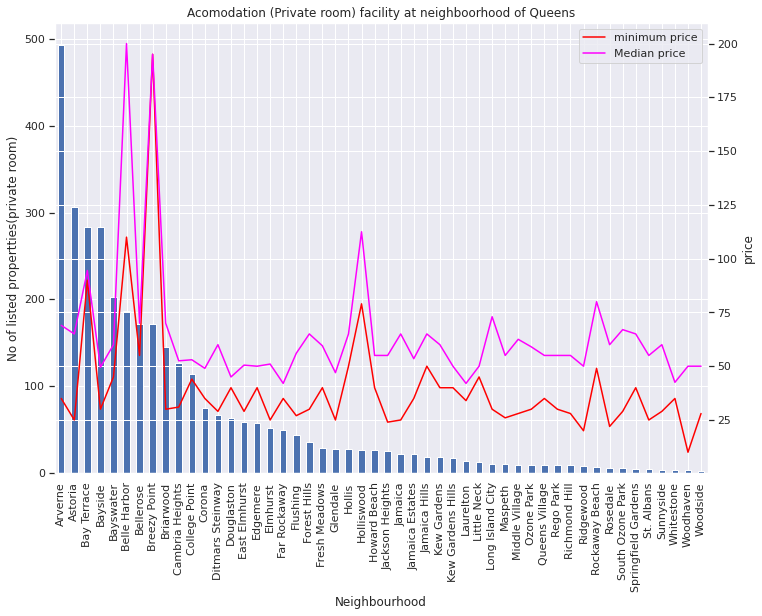

Number of neighborhoods in Queens where rental housing (private room) is listed: 50


In [159]:
# find out number of airbnb acomodation facility at neighboorhood of Queens depend on room type private room
queens_pri_room = Queens_data[Queens_data['room_type']=='Private room']
que_ax1 = queens_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (private room) is listed: {queens_pri_room["neighbourhood"].nunique()}')

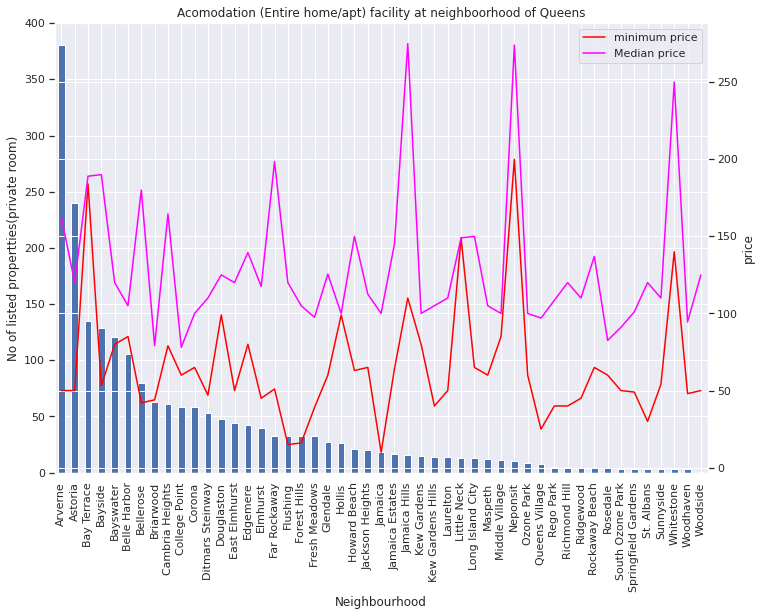

Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: 49


In [160]:
#find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **Entire home/apt**
queens_ent_room = Queens_data[Queens_data['room_type']=='Entire home/apt']
que_ax1 = queens_ent_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: {queens_ent_room["neighbourhood"].nunique()}')

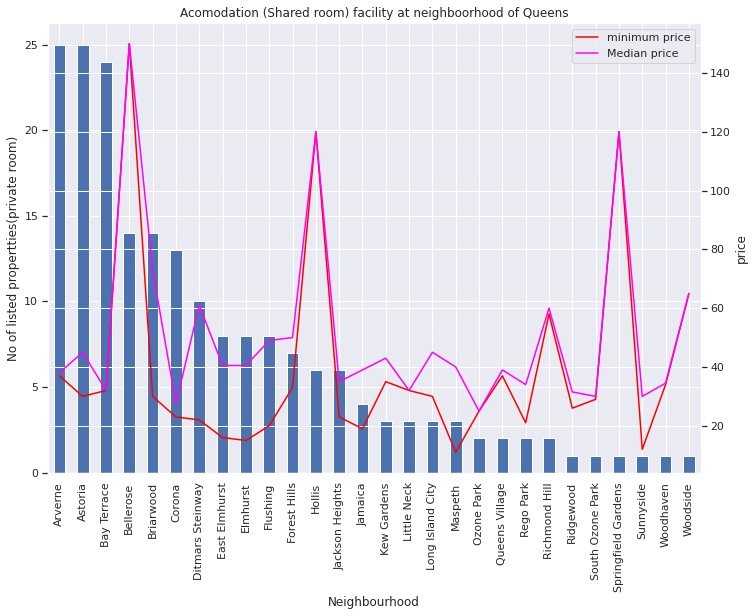

Number of neighborhoods in Queens where rental housing (shared room) is listed: 28


In [161]:
# find out number of airbnb acomodation facility at neighboorhood of Queens depend on room type Shared room
queens_shr_room = Queens_data[Queens_data['room_type']== 'Shared room']
que_ax1 = queens_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (shared room) is listed: {queens_shr_room["neighbourhood"].nunique()}')

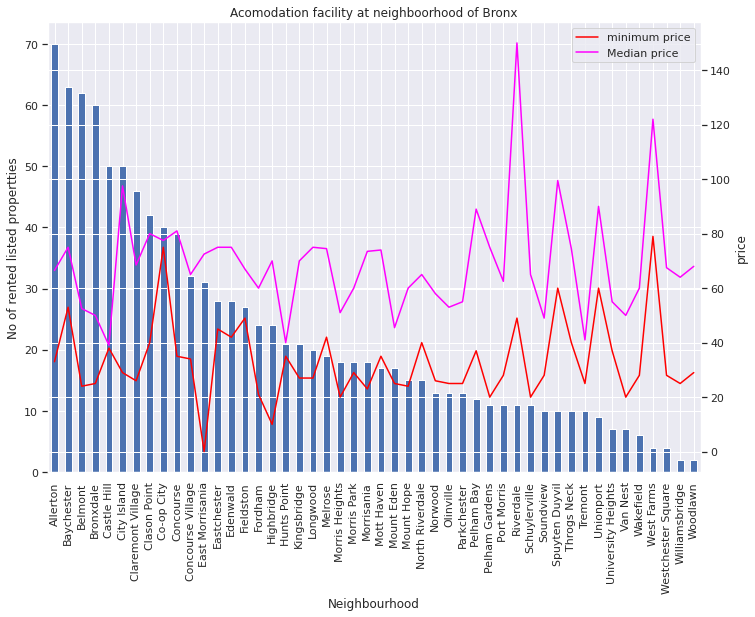

Number of neighborhoods in Bronx where rental housing is listed: 48


In [162]:
# find out number of airbnb acomodation facility at neighboorhood of Bronx
bronx_data = df[df['neighbourhood_group'] == 'Bronx']
bro_ax1 = bronx_data['neighbourhood'].value_counts().plot(kind="bar",
                                                          ylabel='No of rented listed propertties',
                                                          xlabel='Neighbourhood',
                                                          title='Acomodation facility at neighboorhood of Bronx')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Bronx'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Bronx'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing is listed: {bronx_data["neighbourhood"].nunique()}')

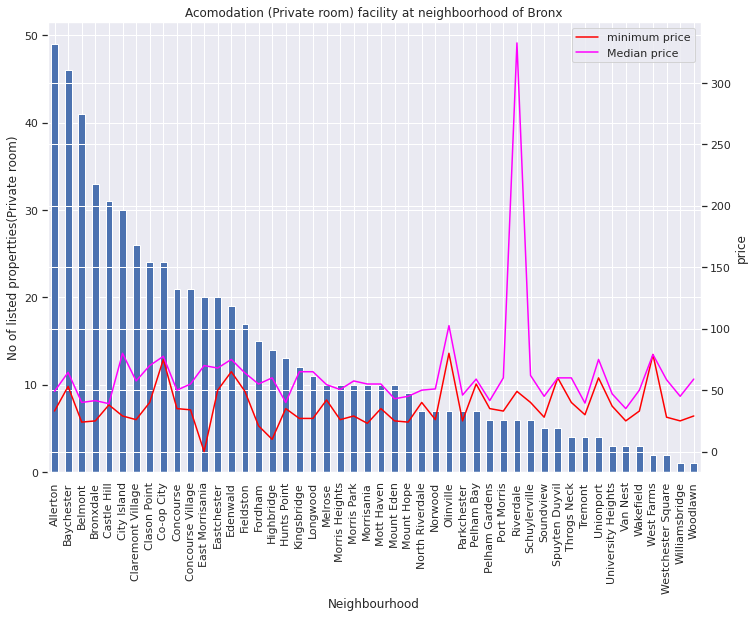

Number of neighborhoods in Bronx where rental housing (private room) is listed: 48


In [163]:
# find out number of airbnb acomodation facility at neighboorhood of Bronx depend on room type private room
bronx_pri_room = bronx_data[bronx_data['room_type']=='Private room']
bronx_ax1 =bronx_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (private room) is listed: {bronx_pri_room["neighbourhood"].nunique()}')

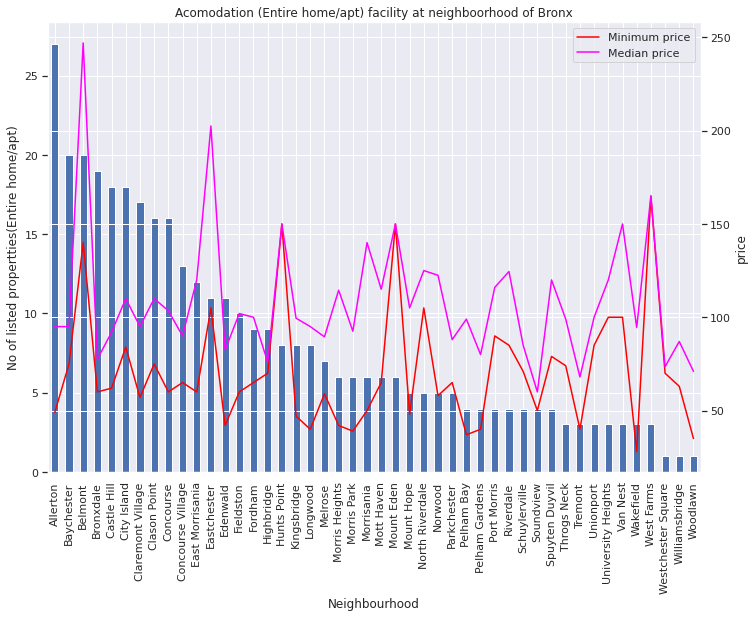

Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: 46


In [164]:
# find out number of airbnb acomodation facility at neighboorhood of Bronx depend on room type Entire apt
bronx_apt_room = bronx_data[bronx_data['room_type']=='Entire home/apt']
bro_ax1 =bronx_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Bronx')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: {bronx_apt_room["neighbourhood"].nunique()}')

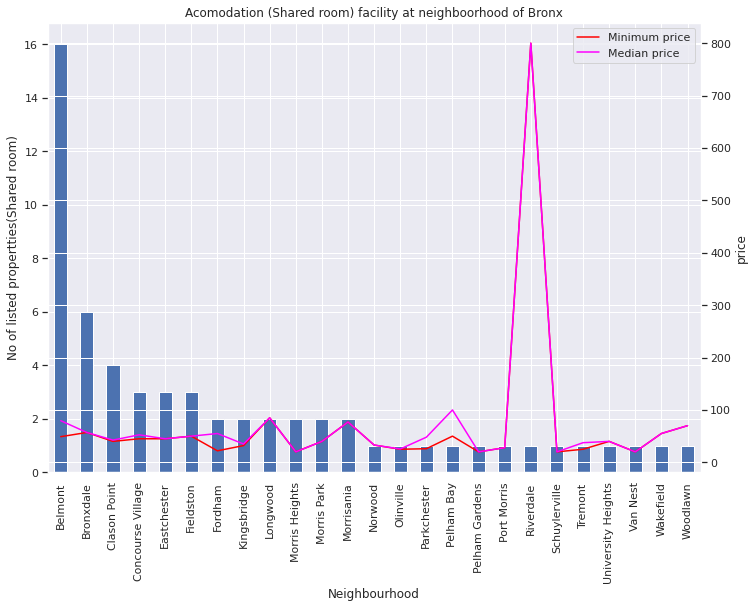

Number of neighborhoods in Bronx where rental housing (shared room) is listed: 25


In [165]:
# find out number of airbnb acomodation facility at neighboorhood of Bronx depend on room type shared room
bronx_shr_room = bronx_data[bronx_data['room_type']=='Shared room']
bronx_ax1 =bronx_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                               ylabel='No of listed propertties(Shared room)',
                                                               xlabel='Neighbourhood',
                                                               title='Acomodation (Shared room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='Maximum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (shared room) is listed: {bronx_shr_room["neighbourhood"].nunique()}')

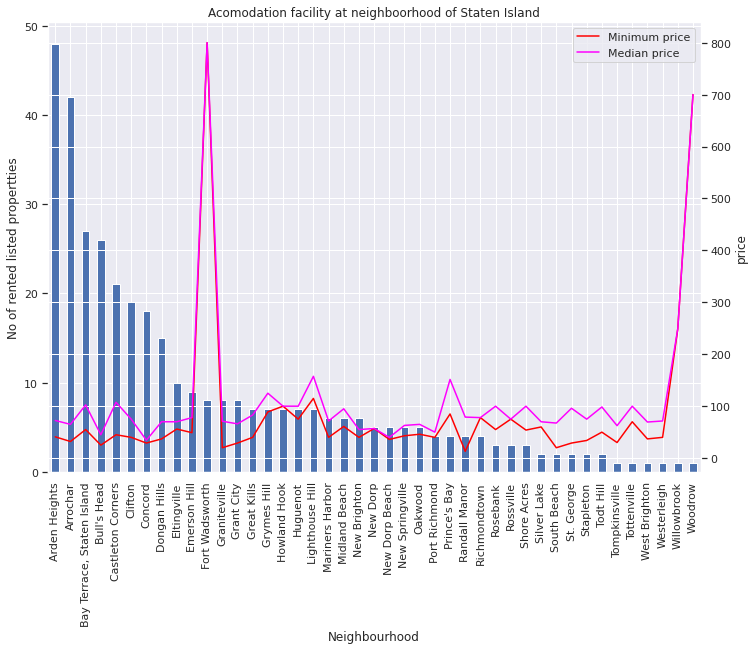

Number of neighborhoods in Staten Island where rental housing is listed: 43


In [166]:
# find out number of airbnb acomodation facility at neighboorhood of Staten Island
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Staten Island')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='Maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing is listed: {staten_is_data["neighbourhood"].nunique()}')

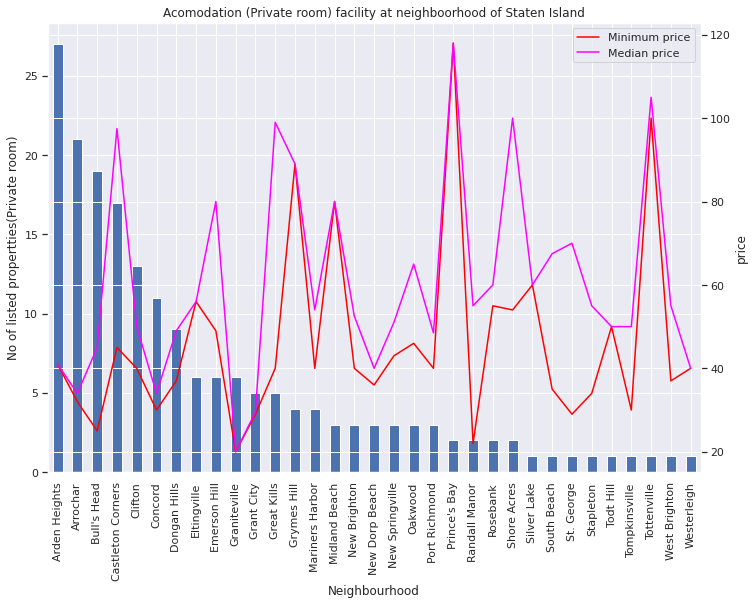

Number of neighborhoods in Staten Island where rental housing (private room) is listed: 33


In [167]:
# find out number of airbnb acomodation facility at neighboorhood of Staten Island depend on room type Private room
staten_pri_room = staten_is_data[staten_is_data['room_type']=='Private room']
staten_ax1 =staten_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (private room) is listed: {staten_pri_room["neighbourhood"].nunique()}')

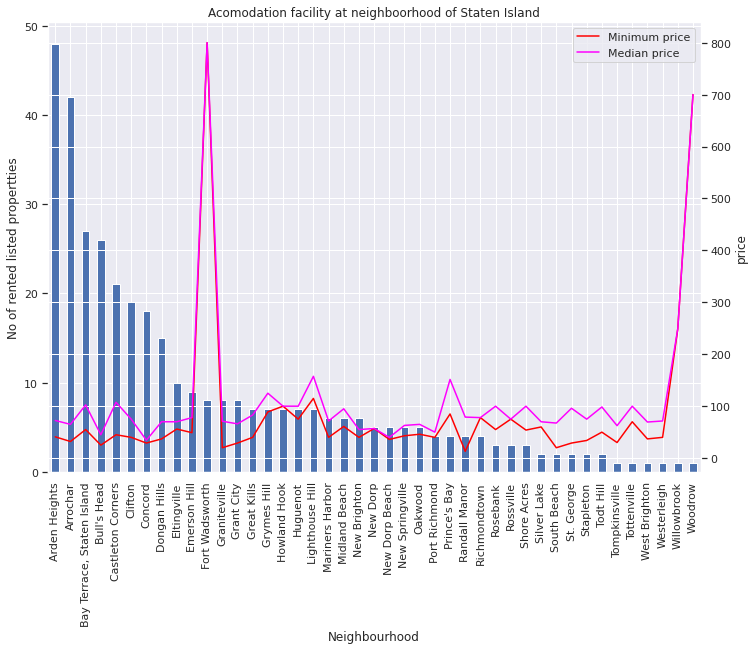

Number of neighborhoods in Staten Island where rental housing is listed: 43


In [168]:
# find out number of airbnb acomodation facility at neighboorhood of Staten Island depend on room type Entire home/apt
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Staten Island')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='Maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing is listed: {staten_is_data["neighbourhood"].nunique()}')

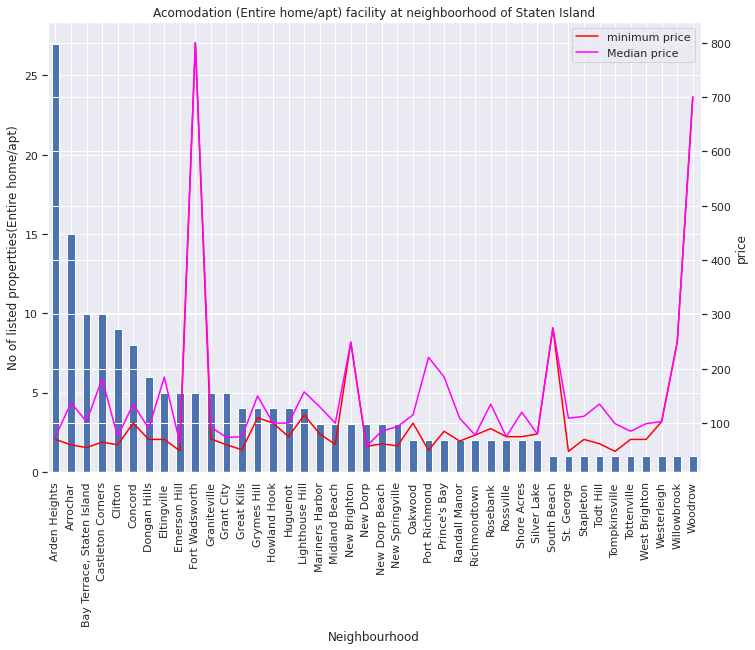

Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: 42


In [169]:
staten_apt_room = staten_is_data[staten_is_data['room_type']=='Entire home/apt']
staten_ax1 =staten_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: {staten_apt_room["neighbourhood"].nunique()}')

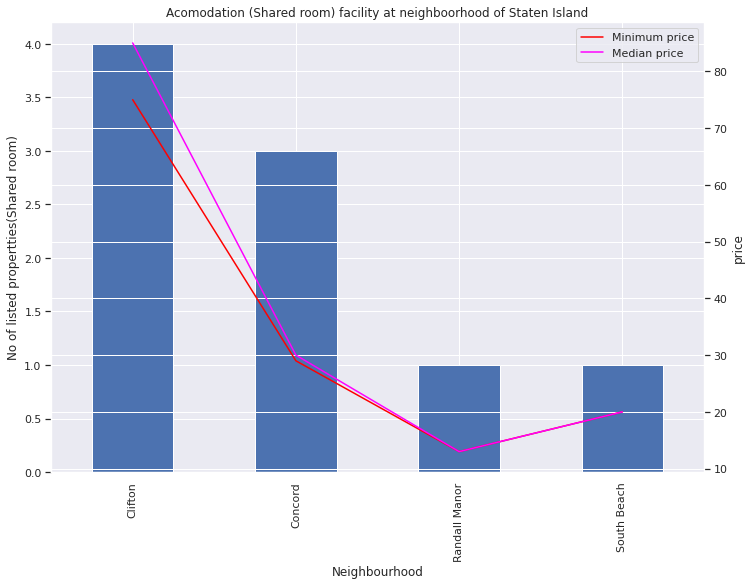

Number of neighborhoods in Staten Island where rental housing (shared room) is listed: 4


In [170]:
# find out number of airbnb acomodation facility at neighboorhood of Staten Island depend on room type Shared room
staten_shr_room = staten_is_data[staten_is_data['room_type']=='Shared room']
staten_ax1 =staten_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (shared room) is listed: {staten_shr_room["neighbourhood"].nunique()}')